## Analysing the distrbution of AQI values across all counties

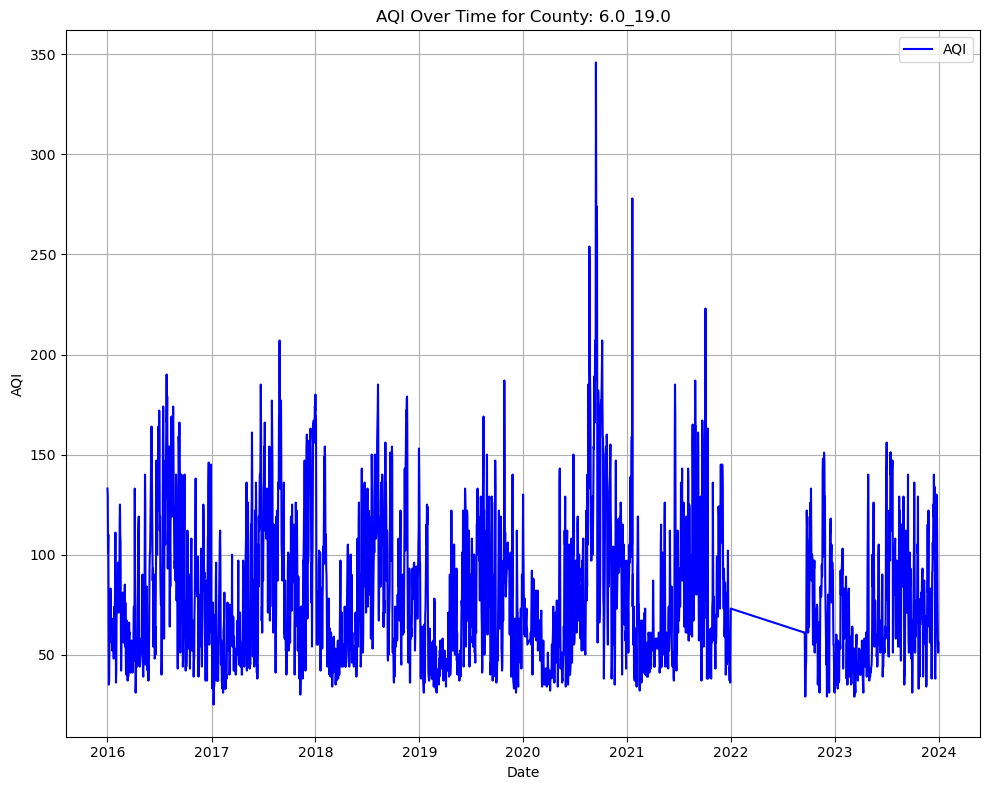

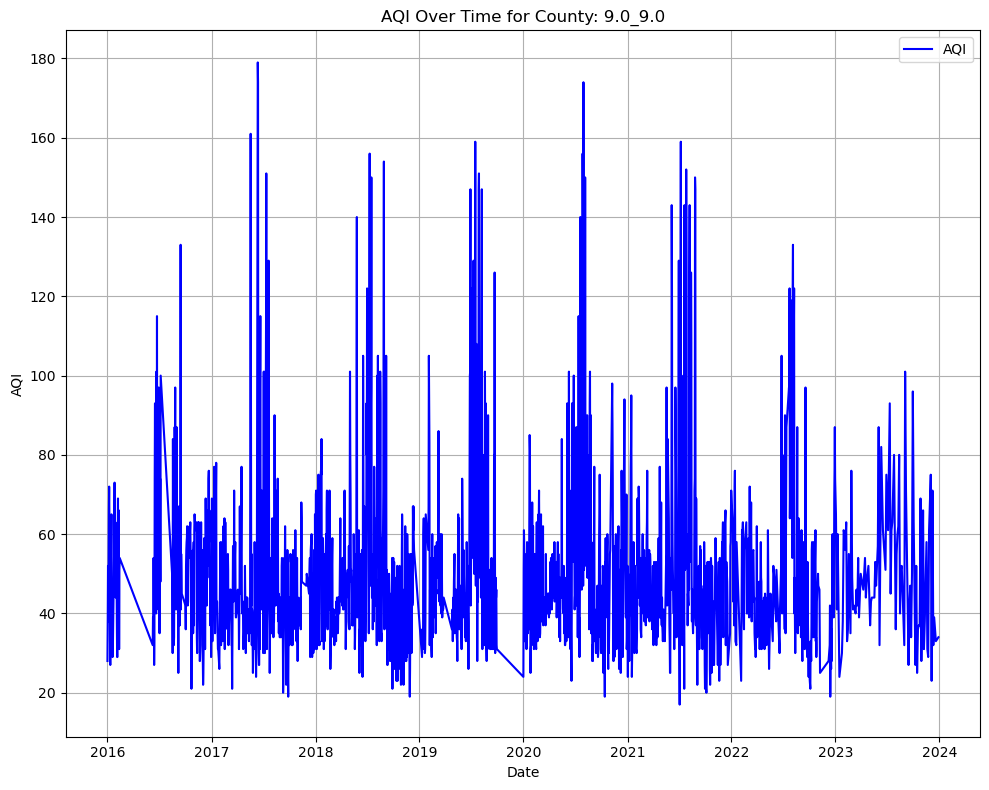

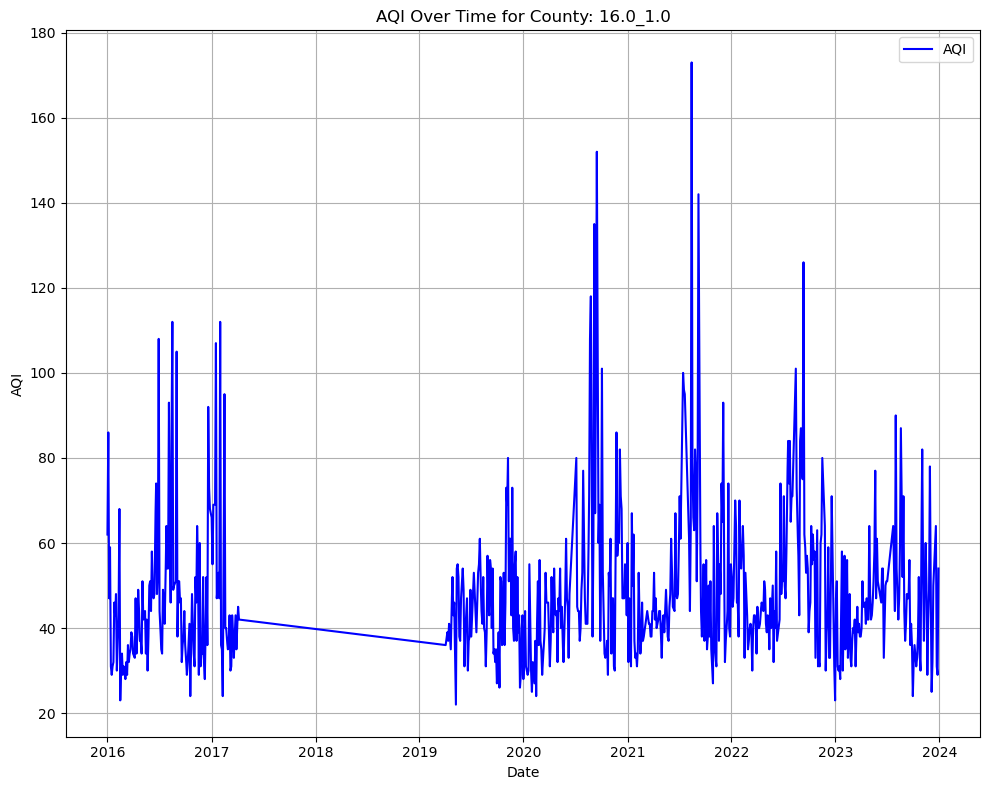

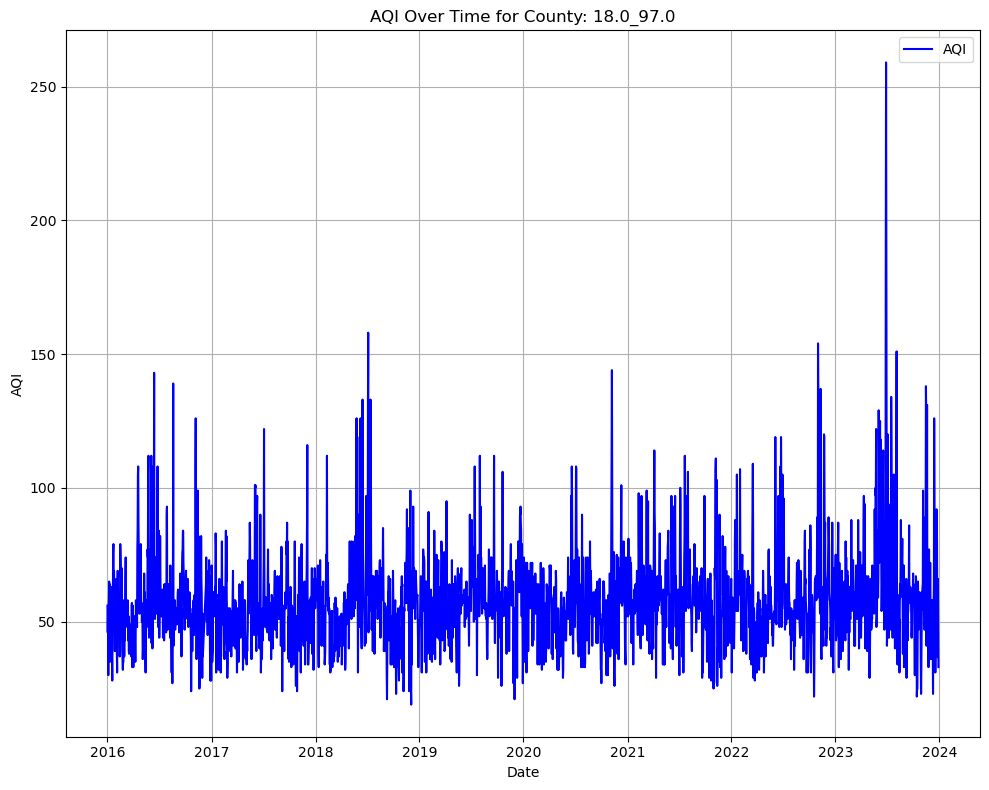

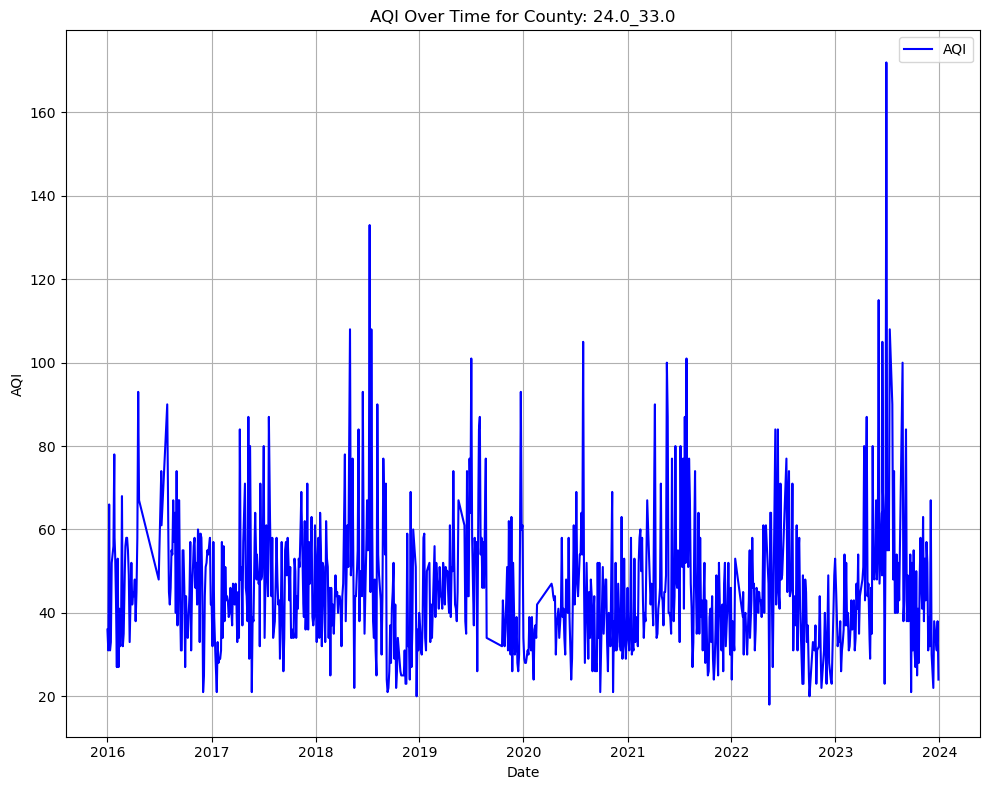

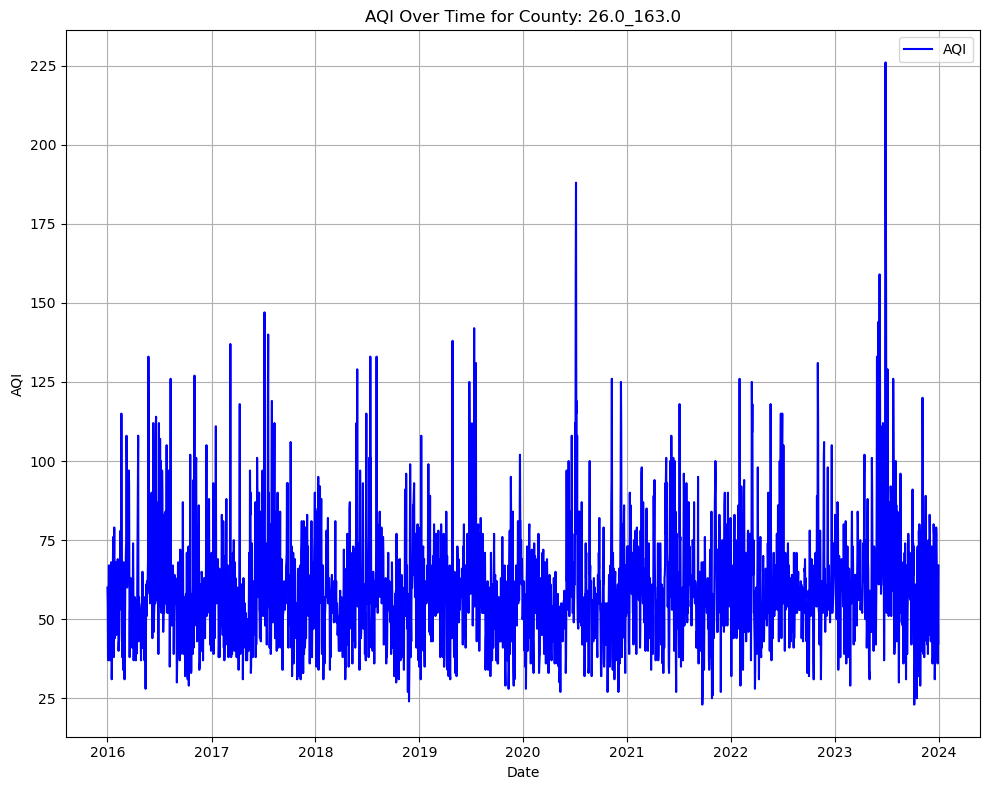

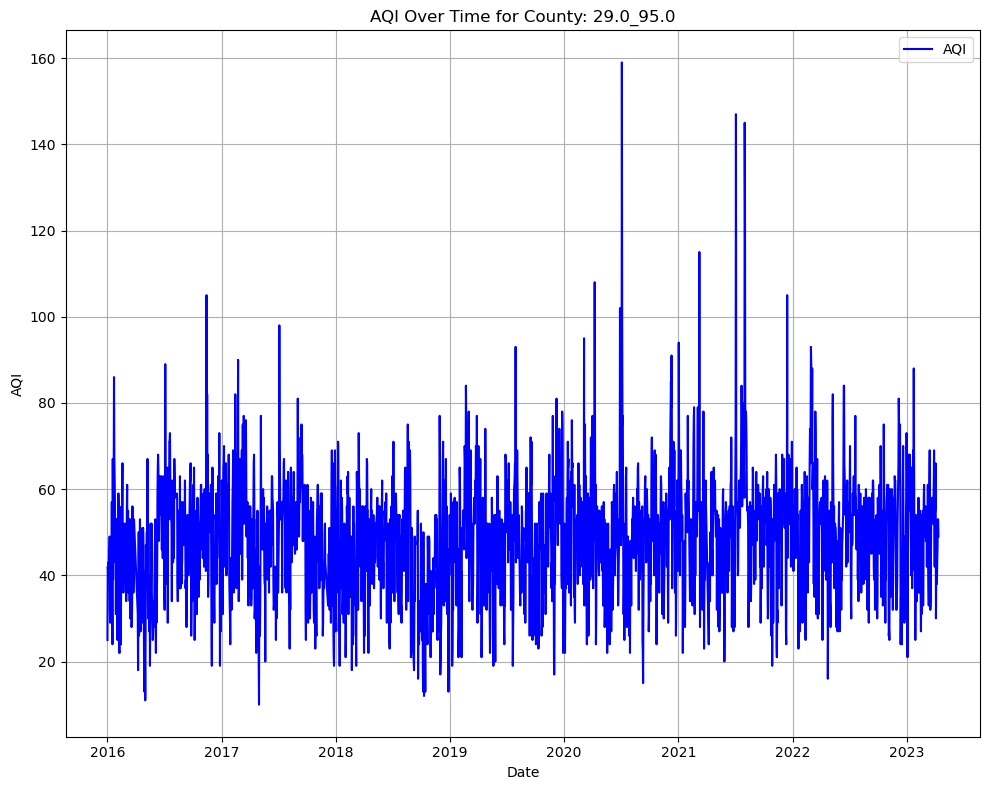

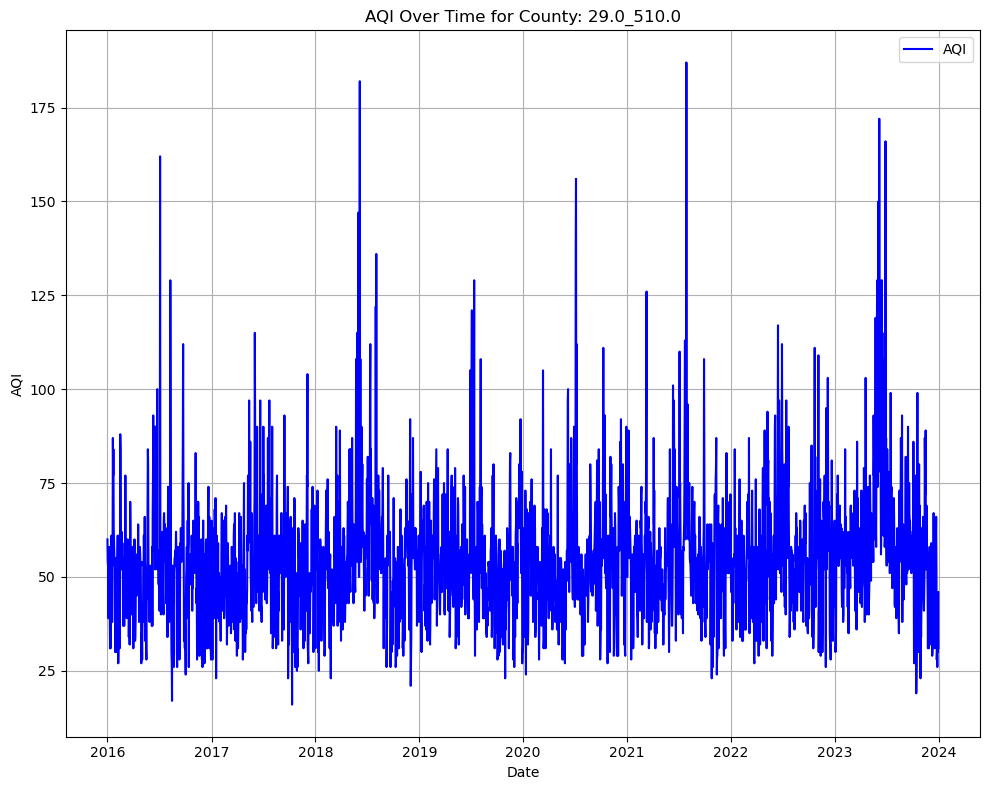

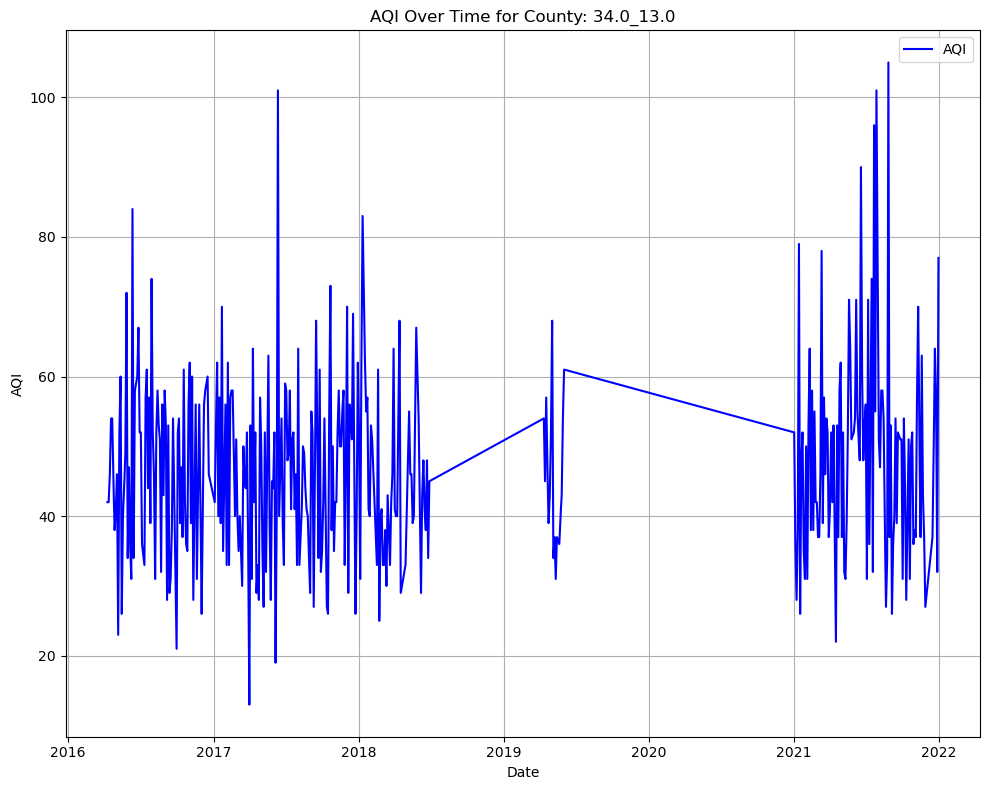

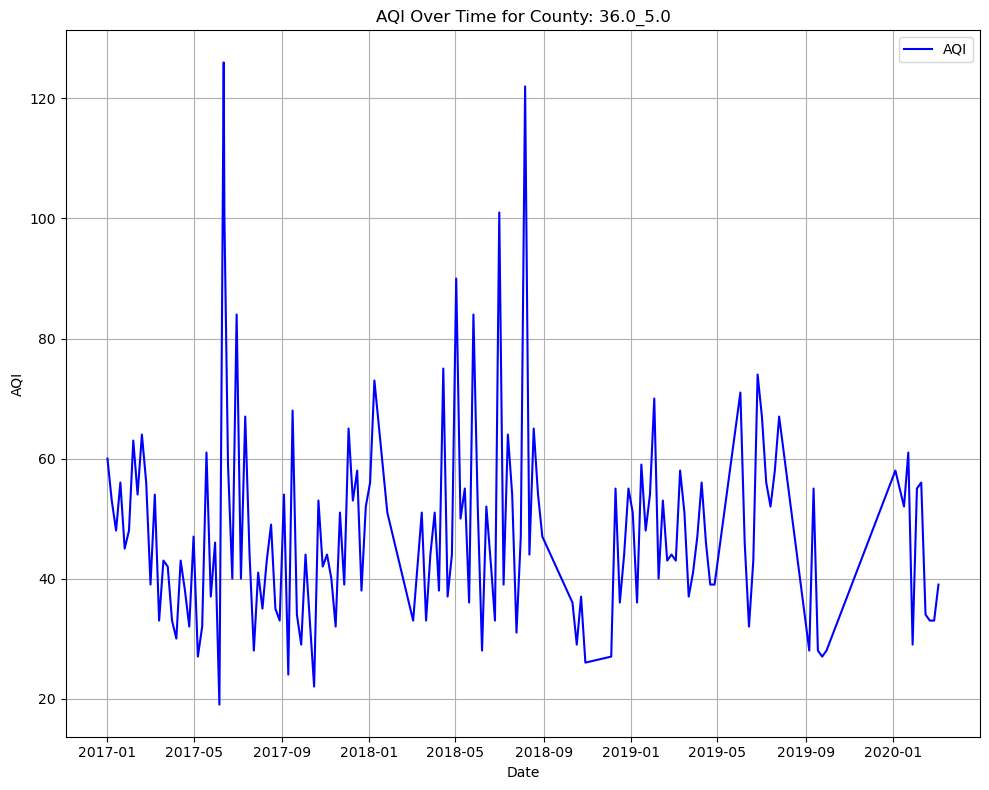

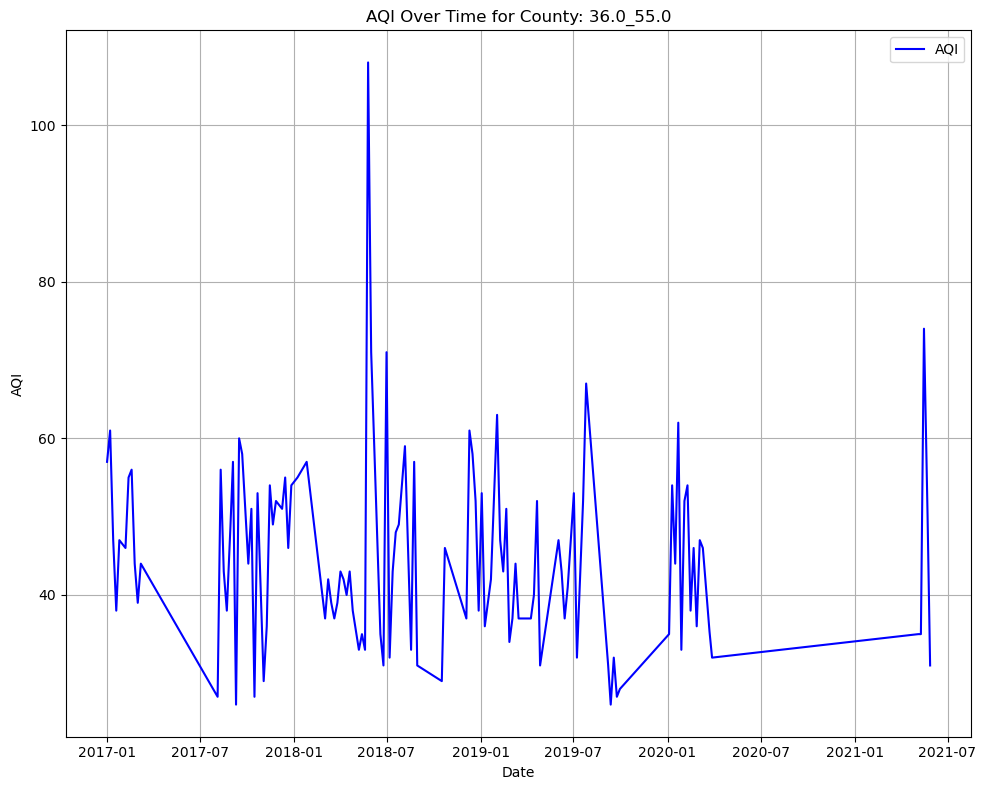

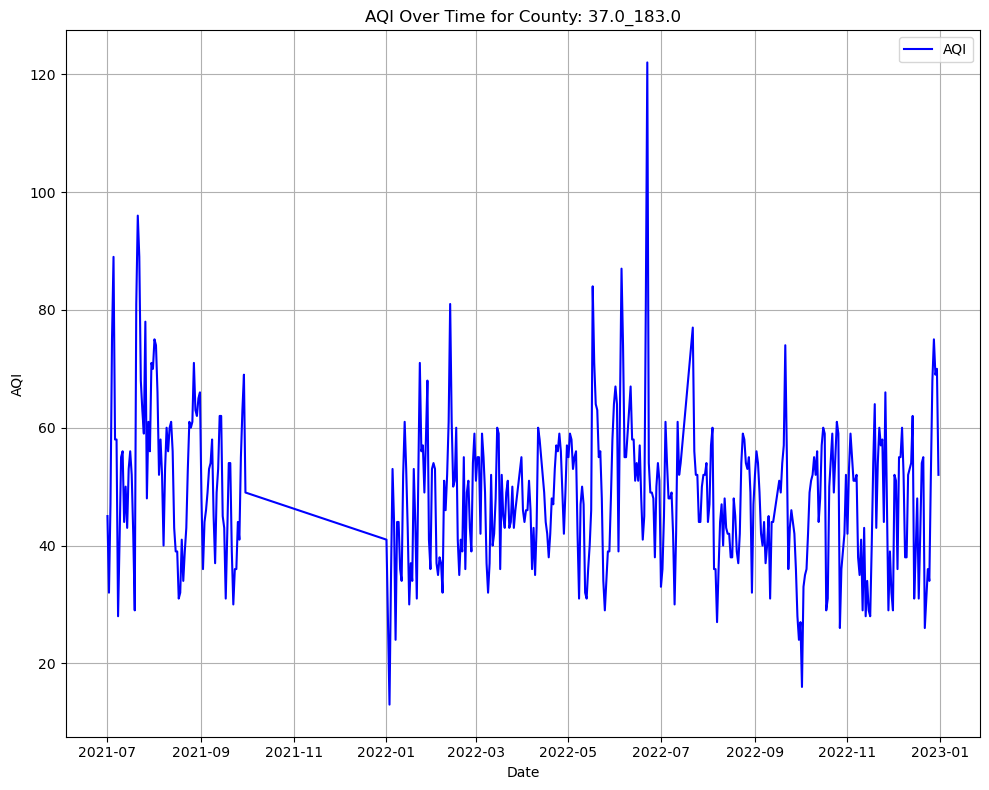

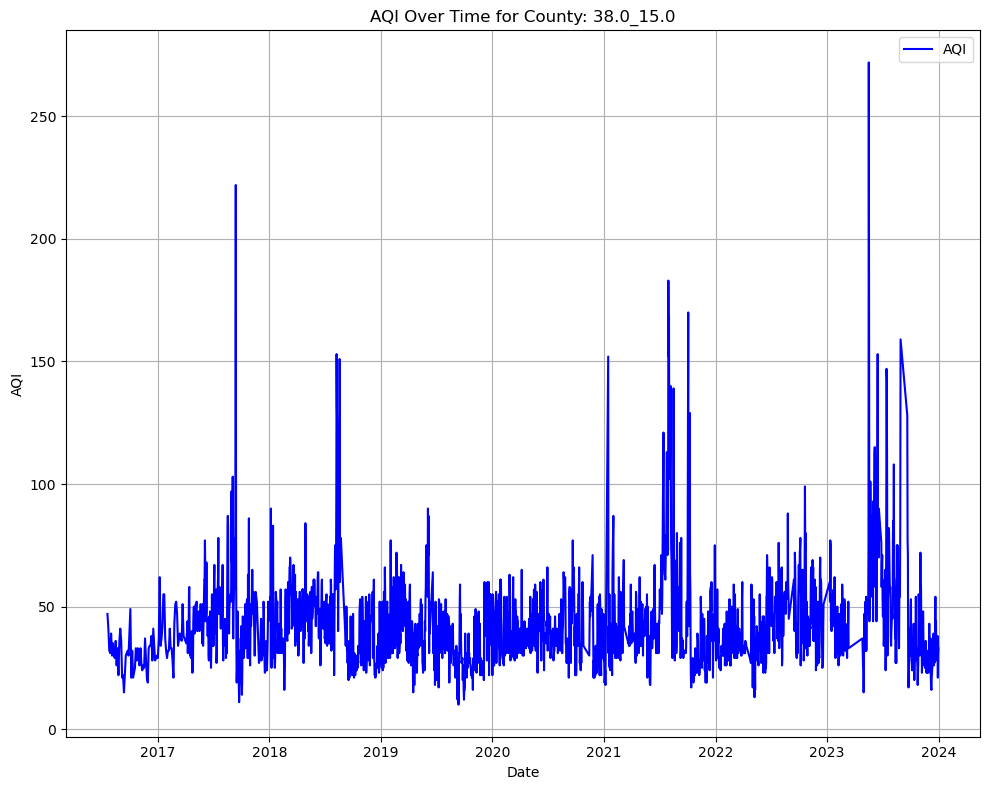

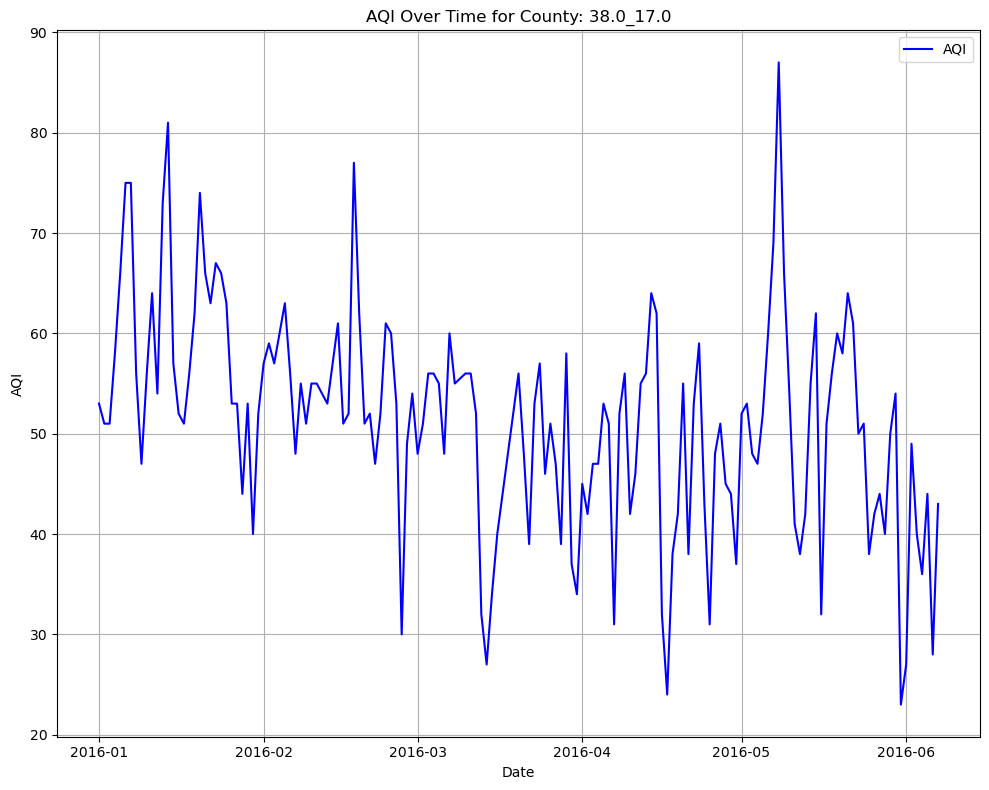

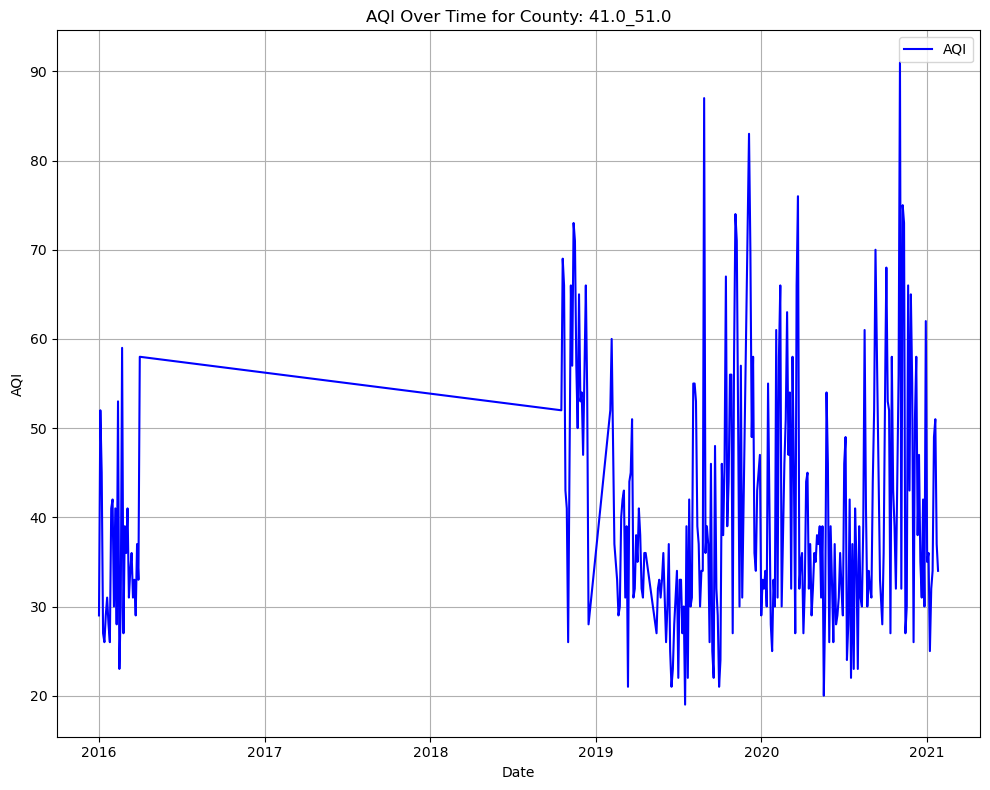

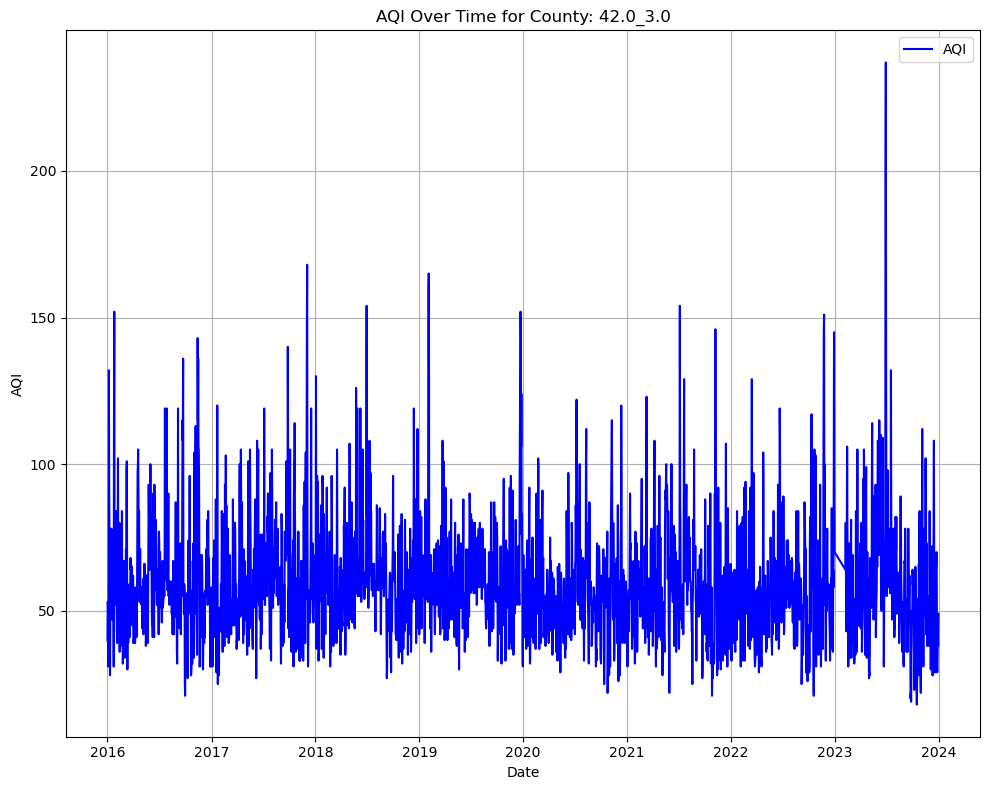

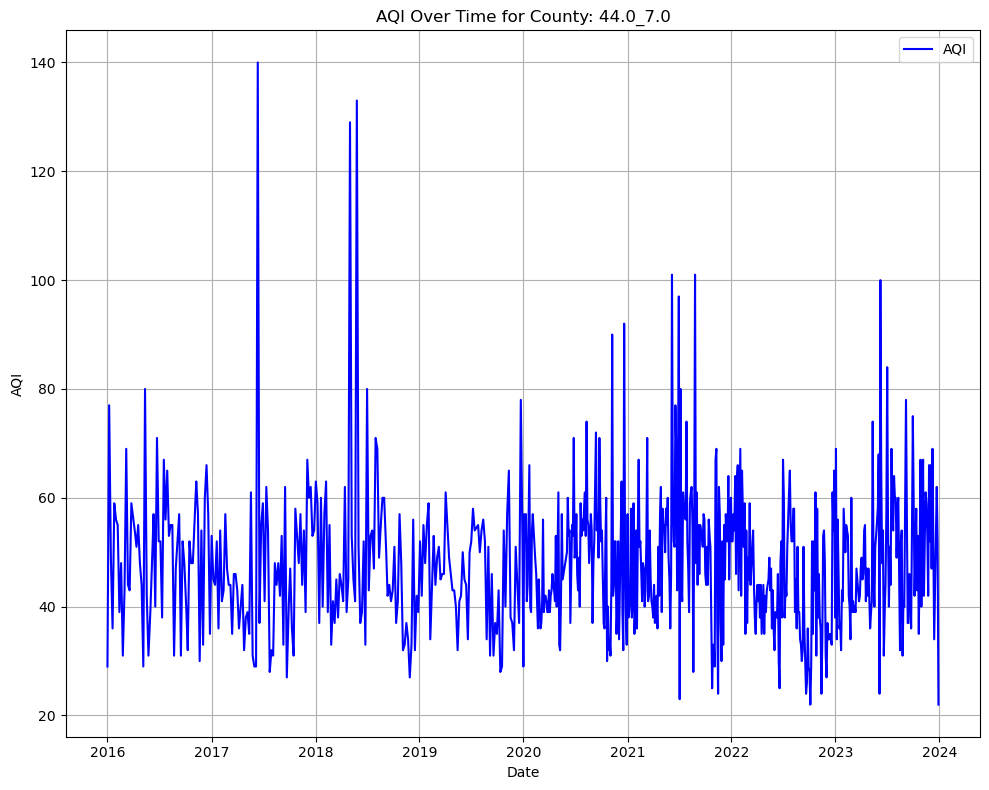

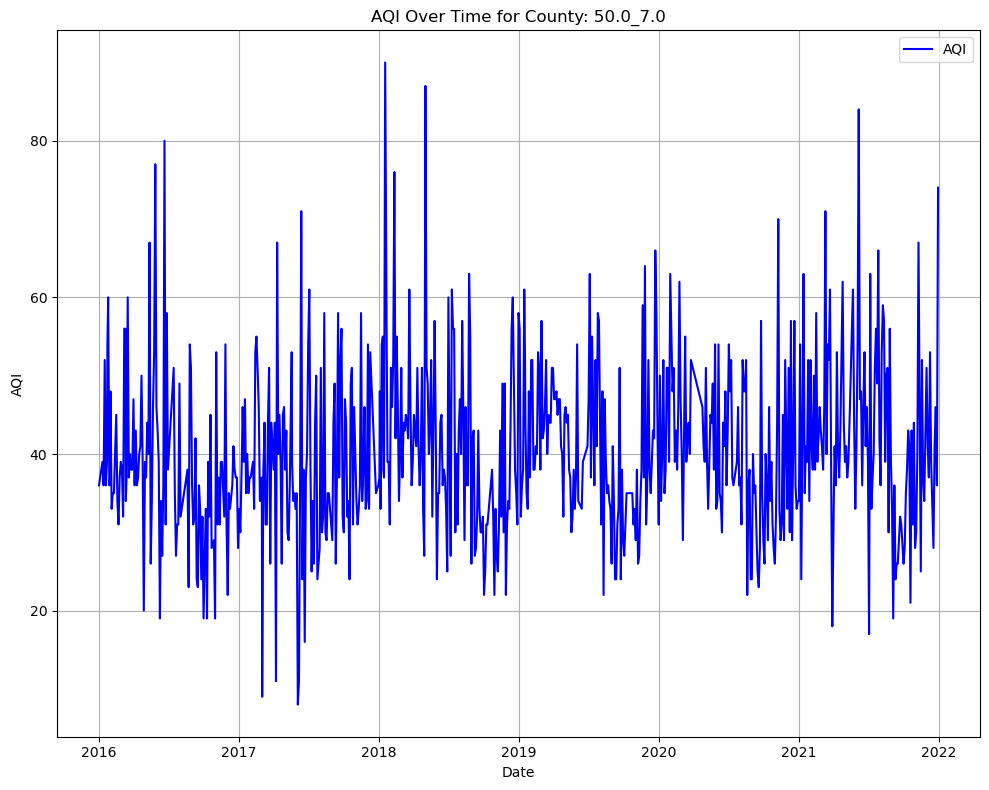

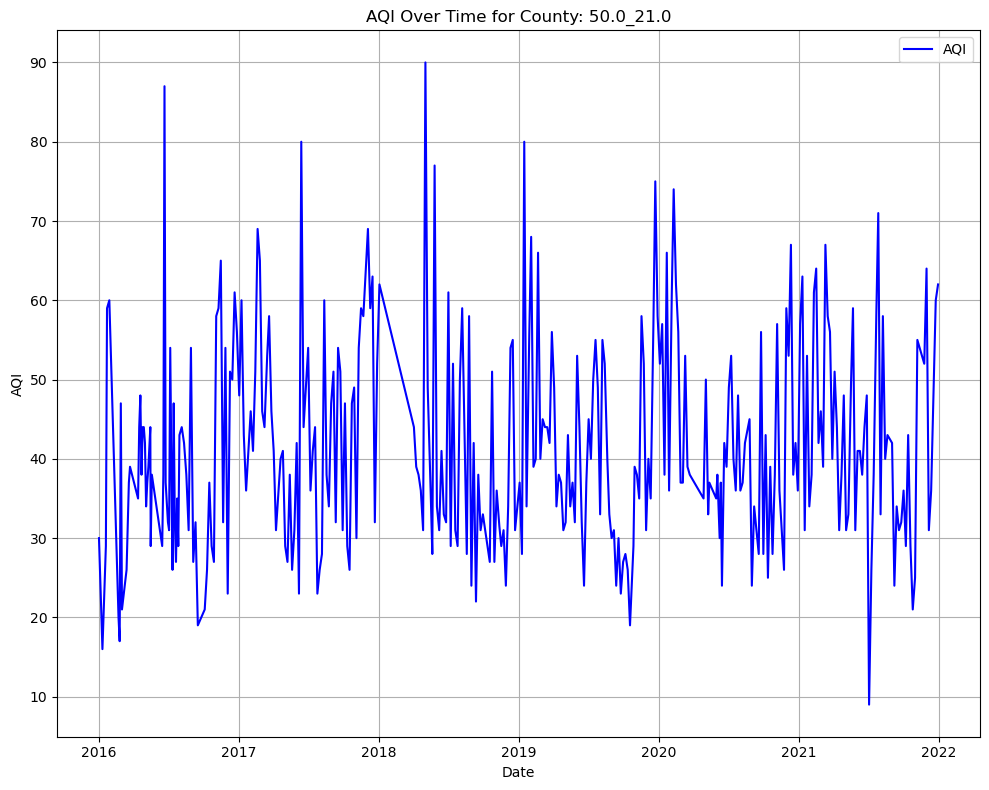

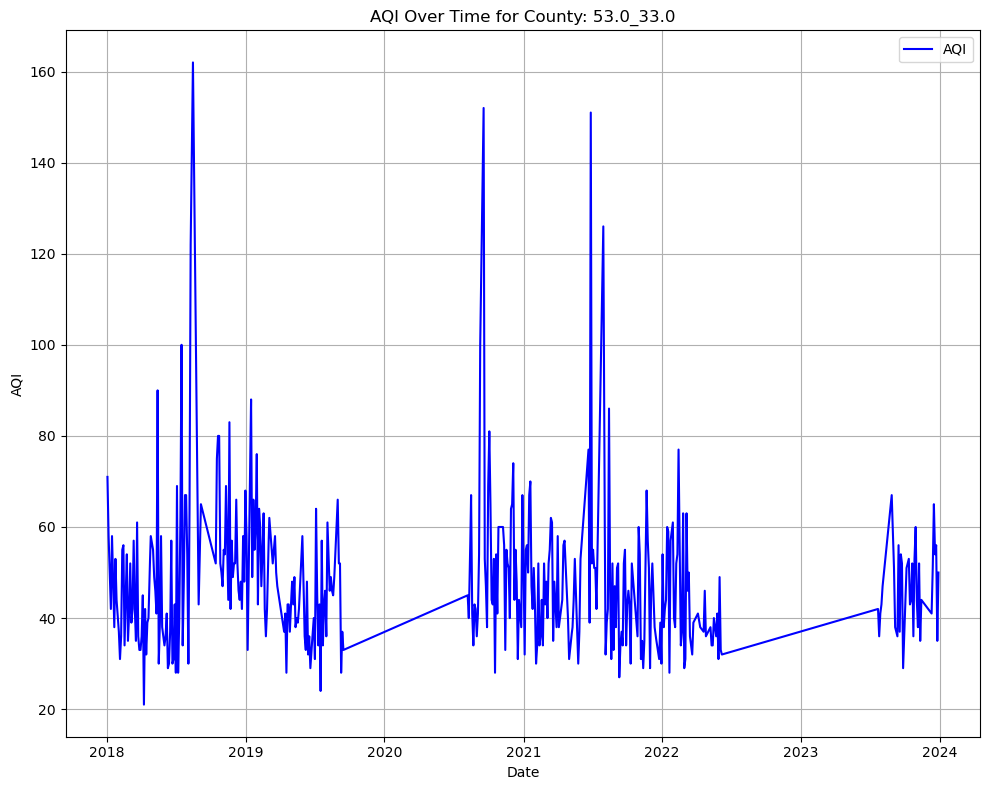

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# Step 1: Load Data
data = pd.read_csv('/Users/akshayreddy/Documents/CapstoneGit/selected_counties_data.csv', parse_dates=['Date'])

# Step 2: Data Cleaning
data.fillna(method='ffill', inplace=True)
data.sort_values(by=['State Code', 'County Code', 'Date'], inplace=True)

# Step 3: Handling Variability Across Counties
county_groups = data.groupby(['State Code', 'County Code'])

# Function to preprocess each county
def preprocess_county(group):
    group = group.set_index('Date').resample('D').mean()
    group.interpolate(method='linear', inplace=True)
    return group.reset_index()

data_preprocessed = county_groups.apply(preprocess_county)
data_preprocessed.reset_index(drop=True, inplace=True)

# Plotting AQI values over time for each county
for (state_code, county_code), group in data_preprocessed.groupby(['State Code', 'County Code']):
    plt.figure(figsize=(10, 8))
    plt.plot(group['Date'], group['AQI'], label='AQI', color='blue')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.title(f'AQI Over Time for County: {state_code}_{county_code}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [10]:
# Data from the provided table
data = [
    (6, 19, "California", "Fresno"),
    (9, 9, "Connecticut", "New Haven"),
    (16, 1, "Idaho", "Ada"),
    (18, 97, "Indiana", "Marion"),
    (24, 33, "Maryland", "Prince Georges"),
    (26, 163, "Michigan", "Wayne"),
    (29, 95, "Missouri", "Jackson"),
    (29, 510, "Missouri", "St Louis"),
    (34, 13, "New Jersey", "Essex"),
    (36, 5, "New York", "Bronx"),
    (36, 55, "New York", "Wisconsin"),
    (37, 183, "North Carolina", "Wake"),
    (38, 15, "North Dakota", "Burleigh"),
    (38, 17, "North Dakota", "Cass"),
    (41, 51, "Oregon", "Multnomah"),
    (42, 3, "Pennsylvania", "Allegheny"),
    (44, 7, "Rhode Island", "Providence"),
    (50, 7, "Vermont", "Chittenden"),
    (50, 21, "Vermont", "Windsor"),
    (53, 33, "Washington", "King")
]

# Create the dictionary
county_dict = {
    f"{state_code}_{county_code}": (county_name, state_name)
    for state_code, county_code, state_name, county_name in data
}

# Display the dictionary
print(county_dict)


{'6_19': ('Fresno', 'California'), '9_9': ('New Haven', 'Connecticut'), '16_1': ('Ada', 'Idaho'), '18_97': ('Marion', 'Indiana'), '24_33': ('Prince Georges', 'Maryland'), '26_163': ('Wayne', 'Michigan'), '29_95': ('Jackson', 'Missouri'), '29_510': ('St Louis', 'Missouri'), '34_13': ('Essex', 'New Jersey'), '36_5': ('Bronx', 'New York'), '36_55': ('Wisconsin', 'New York'), '37_183': ('Wake', 'North Carolina'), '38_15': ('Burleigh', 'North Dakota'), '38_17': ('Cass', 'North Dakota'), '41_51': ('Multnomah', 'Oregon'), '42_3': ('Allegheny', 'Pennsylvania'), '44_7': ('Providence', 'Rhode Island'), '50_7': ('Chittenden', 'Vermont'), '50_21': ('Windsor', 'Vermont'), '53_33': ('King', 'Washington')}


## AQI distribution of Specific Counties

/var/folders/63/l487hncs0sx_mcz7h3t_bxmc0000gn/T/ipykernel_34719/3445672497.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


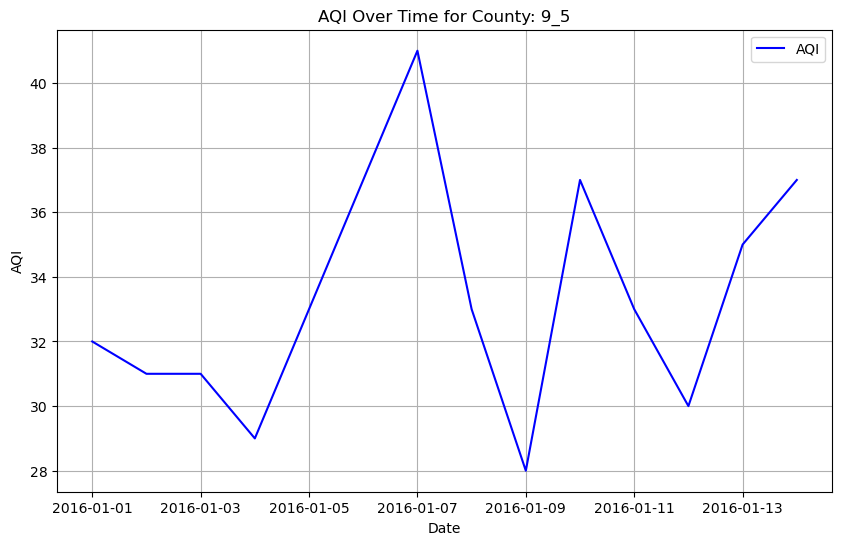

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load Data
data = pd.read_csv('/Users/HP/Desktop/Predicting Air Quality and Pollution/filtered_aqi_data.csv', parse_dates=['Date'])

# Step 2: Data Cleaning
data.fillna(method='ffill', inplace=True)
data.sort_values(by=['State Code', 'County Code', 'Date'], inplace=True)

# Step 3: Handling Variability Across Counties
county_groups = data.groupby(['State Code', 'County Code'])

# Function to preprocess each county
def preprocess_county(group):
    group = group.set_index('Date').resample('D').mean()
    group.interpolate(method='linear', inplace=True)
    return group.reset_index()

data_preprocessed = county_groups.apply(preprocess_county)
data_preprocessed.reset_index(drop=True, inplace=True)

# Function to plot AQI for a specific county and state
def plot_aqi(state_code, county_code):
    # Filter data for the desired state and county
    county_data = data_preprocessed[
        (data_preprocessed['State Code'] == state_code) & 
        (data_preprocessed['County Code'] == county_code)
    ]
    
    if county_data.empty:
        print(f"No data available for State Code: {state_code}, County Code: {county_code}")
        return
    
    # Plot AQI values over time
    plt.figure(figsize=(10, 6))
    plt.plot(county_data['Date'], county_data['AQI'], label='AQI', color='blue')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.title(f'AQI Over Time for County: {state_code}_{county_code}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage: Provide the desired state_code and county_code
plot_aqi(state_code=9, county_code=5)  


## Finalised County and State Info

In [11]:
from tabulate import tabulate

# Data from the provided table
data = [
    (1, 6, 19, "California", "Fresno"),
    (2, 9, 9, "Connecticut", "New Haven"),
    (3, 16, 1, "Idaho", "Ada"),
    (4, 18, 97, "Indiana", "Marion"),
    (5, 24, 33, "Maryland", "Prince Georges"),
    (6, 26, 163, "Michigan", "Wayne"),
    (7, 29, 95, "Missouri", "Jackson"),
    (8, 29, 510, "Missouri", "St Louis"),
    (9, 34, 13, "New Jersey", "Essex"),
    (10, 36, 5, "New York", "Bronx"),
    (11, 36, 55, "New York", "Wisconsin"),
    (12, 37, 183, "North Carolina", "Wake"),
    (13, 38, 15, "North Dakota", "Burleigh"),
    (14, 38, 17, "North Dakota", "Cass"),
    (15, 41, 51, "Oregon", "Multnomah"),
    (16, 42, 3, "Pennsylvania", "Allegheny"),
    (17, 44, 7, "Rhode Island", "Providence"),
    (18, 50, 7, "Vermont", "Chittenden"),
    (19, 50, 21, "Vermont", "Windsor"),
    (20, 53, 33, "Washington", "King")
]

# Define the headers for the table
headers = ["Sl.No", "State Code", "County Code", "State", "County"]

# Display the data in a fancy grid format
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))


╒═════════╤══════════════╤═══════════════╤════════════════╤════════════════╕
│   Sl.No │   State Code │   County Code │ State          │ County         │
╞═════════╪══════════════╪═══════════════╪════════════════╪════════════════╡
│       1 │            6 │            19 │ California     │ Fresno         │
├─────────┼──────────────┼───────────────┼────────────────┼────────────────┤
│       2 │            9 │             9 │ Connecticut    │ New Haven      │
├─────────┼──────────────┼───────────────┼────────────────┼────────────────┤
│       3 │           16 │             1 │ Idaho          │ Ada            │
├─────────┼──────────────┼───────────────┼────────────────┼────────────────┤
│       4 │           18 │            97 │ Indiana        │ Marion         │
├─────────┼──────────────┼───────────────┼────────────────┼────────────────┤
│       5 │           24 │            33 │ Maryland       │ Prince Georges │
├─────────┼──────────────┼───────────────┼────────────────┼────────────────┤

## Descriptive Stats for the selected counties dataset

In [4]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
file_path = '/Users/akshayreddy/Documents/CapstoneGit/selected_counties_data.csv'
data = pd.read_csv(file_path)

# Generate descriptive statistics
basic_stats = data.describe().T  # Basic stats: count, mean, std, min, max, etc.

# Calculate skewness and kurtosis for each numerical column
skewness = data.skew(numeric_only=True).to_frame('Skewness')
kurtosis = data.kurtosis(numeric_only=True).to_frame('Kurtosis')

# Merge all statistics into a single DataFrame
descriptive_stats = pd.concat([basic_stats, skewness, kurtosis], axis=1)

# Round all values to 2 decimal places
descriptive_stats = descriptive_stats.round(2)

# Display the descriptive statistics in a fancy grid format
print(tabulate(descriptive_stats, headers='keys', tablefmt='fancy_grid'))


╒═════════════╤═════════╤════════╤════════╤════════╤════════╤════════╤═════════╤═════════╤════════════╤════════════╕
│             │   count │   mean │    std │    min │    25% │    50% │     75% │     max │   Skewness │   Kurtosis │
╞═════════════╪═════════╪════════╪════════╪════════╪════════╪════════╪═════════╪═════════╪════════════╪════════════╡
│ State Code  │   26234 │  27.36 │  12.73 │   6    │  18    │  29    │   38    │   53    │      -0.12 │      -0.84 │
├─────────────┼─────────┼────────┼────────┼────────┼────────┼────────┼─────────┼─────────┼────────────┼────────────┤
│ County Code │   26234 │ 105.25 │ 152.88 │   1    │   9    │  33    │   97    │  510    │       1.94 │       2.53 │
├─────────────┼─────────┼────────┼────────┼────────┼────────┼────────┼─────────┼─────────┼────────────┼────────────┤
│ AQI         │   26234 │  55.12 │  22.54 │   8    │  41    │  52    │   62    │  346    │       2.16 │       9.14 │
├─────────────┼─────────┼────────┼────────┼────────┼────────┼───

## Training Random Forest, Gradient Boost and Catboost Models

## Before feature Engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Data
data = pd.read_csv('/Users/akshayreddy/Documents/CapstoneGit/selected_counties_data.csv', parse_dates=['Date'])

# Step 2: Data Cleaning
data.fillna(method='ffill', inplace=True)
data.sort_values(by=['State Code', 'County Code', 'Date'], inplace=True)

# Step 3: Handling Variability Across Counties
county_groups = data.groupby(['State Code', 'County Code'])

def preprocess_county(group):
    group = group.set_index('Date').resample('D').mean()
    group.interpolate(method='linear', inplace=True)
    return group.reset_index()

# Preprocess all counties
data_preprocessed = county_groups.apply(preprocess_county)
data_preprocessed.reset_index(drop=True, inplace=True)


# Function to calculate bias and variance
def calculate_bias_variance(y_true, y_pred):
    bias = np.mean((y_true - np.mean(y_pred)) ** 2)
    variance = np.mean((y_pred - np.mean(y_pred)) ** 2)
    return bias, variance

# Store results in lists
results = []
bias_variance_results = []

# Train models and store metrics
for (state_code, county_code), group in data_preprocessed.groupby(['State Code', 'County Code']):
    X = group[[ 'CO', 'DP', 'NO2', 'PM10', 'PM2.5', 'RH', 'SO2', 'TEMP', 'WD', 'WS']]
    y = group['AQI']

    # Split data: 70% train, 30% test
    train_size = int(len(group) * 0.7)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'CatBoost': CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
    }

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)

        # Predictions for Training and Testing
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Calculate RMSE and R² for Training and Testing
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)

        # Calculate Bias and Variance for Training and Testing
        train_bias, train_variance = calculate_bias_variance(y_train, y_pred_train)
        test_bias, test_variance = calculate_bias_variance(y_test, y_pred_test)

        # Store results
        results.append({
            'County': f'{state_code}_{county_code}',
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2
        })

        bias_variance_results.append({
            'County': f'{state_code}_{county_code}',
            'Model': model_name,
            'Train_Bias': train_bias,
            'Train_Variance': train_variance,
            'Test_Bias': test_bias,
            'Test_Variance': test_variance
        })

# Convert results to DataFrames
results_df = pd.DataFrame(results)
bias_variance_df = pd.DataFrame(bias_variance_results)

# Display the Results DataFrames
print("Results DataFrame:")
print(results_df)

print("\nBias-Variance Results DataFrame:")
print(bias_variance_df)

# Calculate average RMSE, R², Bias, and Variance across all models for Training and Testing
average_train_rmse = results_df.groupby('Model')['Train_RMSE'].mean().to_dict()
average_train_r2 = results_df.groupby('Model')['Train_R2'].mean().to_dict()
average_test_rmse = results_df.groupby('Model')['Test_RMSE'].mean().to_dict()
average_test_r2 = results_df.groupby('Model')['Test_R2'].mean().to_dict()

average_train_bias = bias_variance_df.groupby('Model')['Train_Bias'].mean().to_dict()
average_train_variance = bias_variance_df.groupby('Model')['Train_Variance'].mean().to_dict()
average_test_bias = bias_variance_df.groupby('Model')['Test_Bias'].mean().to_dict()
average_test_variance = bias_variance_df.groupby('Model')['Test_Variance'].mean().to_dict()

# Display average metrics
print("\nAverage Training RMSE across all models:")
print(average_train_rmse)

print("\nAverage Training R² across all models:")
print(average_train_r2)

print("\nAverage Testing RMSE across all models:")
print(average_test_rmse)

print("\nAverage Testing R² across all models:")
print(average_test_r2)

print("\nAverage Training Bias across all models:")
print(average_train_bias)

print("\nAverage Training Variance across all models:")
print(average_train_variance)

print("\nAverage Testing Bias across all models:")
print(average_test_bias)

print("\nAverage Testing Variance across all models:")
print(average_test_variance)


/var/folders/63/l487hncs0sx_mcz7h3t_bxmc0000gn/T/ipykernel_74531/3220633798.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

Results DataFrame:
        County              Model  Train_RMSE  Train_R2  Test_RMSE   Test_R2
0     6.0_19.0      Random Forest    5.144122  0.980948  11.195755  0.837376
1     6.0_19.0  Gradient Boosting   10.393119  0.922230  11.697830  0.822464
2     6.0_19.0           CatBoost    6.735734  0.967335  12.132467  0.809026
3      9.0_9.0      Random Forest    3.775567  0.965880   8.847446  0.757717
4      9.0_9.0  Gradient Boosting    6.830537  0.888326   9.100238  0.743674
5      9.0_9.0           CatBoost    4.060033  0.960545   9.335627  0.730242
6     16.0_1.0      Random Forest    1.517721  0.988009   7.658430  0.788241
7     16.0_1.0  Gradient Boosting    3.232099  0.945619   7.685652  0.786733
8     16.0_1.0           CatBoost    1.656482  0.985716   7.421359  0.801148
9    18.0_97.0      Random Forest    2.906234  0.966052   8.835832  0.817265
10   18.0_97.0  Gradient Boosting    5.306323  0.886827   8.583803  0.827541
11   18.0_97.0           CatBoost    3.424147  0.952874  

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression



In [4]:
import pandas as pd
from tabulate import tabulate

# Data for each metric with shorter column names
data = {
    'Model': ['CatBoost', 'Gradient Boosting', 'Random Forest'],
    'Train RMSE': [2.33, 3.82, 2.09],
    'Train R²': [0.97, 0.93, 0.98],
    'Test RMSE': [7.04, 6.51, 6.57],
    'Test R²': [0.72, 0.77, 0.77],
    'Train Bias': [258.43, 258.43, 258.43],
    'Train Variance': [239.70, 222.65, 232.94],
    'Test Bias': [256.89, 256.39, 256.24],
    'Test Variance': [199.87, 209.05, 208.73]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame in a fancy grid format
print(df.to_markdown(index=False, tablefmt="fancy_grid"))


╒═══════════════════╤══════════════╤════════════╤═════════════╤═══════════╤══════════════╤══════════════════╤═════════════╤═════════════════╕
│ Model             │   Train RMSE │   Train R² │   Test RMSE │   Test R² │   Train Bias │   Train Variance │   Test Bias │   Test Variance │
╞═══════════════════╪══════════════╪════════════╪═════════════╪═══════════╪══════════════╪══════════════════╪═════════════╪═════════════════╡
│ CatBoost          │         2.33 │       0.97 │        7.04 │      0.72 │       258.43 │           239.7  │      256.89 │          199.87 │
├───────────────────┼──────────────┼────────────┼─────────────┼───────────┼──────────────┼──────────────────┼─────────────┼─────────────────┤
│ Gradient Boosting │         3.82 │       0.93 │        6.51 │      0.77 │       258.43 │           222.65 │      256.39 │          209.05 │
├───────────────────┼──────────────┼────────────┼─────────────┼───────────┼──────────────┼──────────────────┼─────────────┼─────────────────┤
│ Rand

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Data
data = pd.read_csv('/Users/akshayreddy/Documents/CapstoneGit/selected_counties_data.csv', parse_dates=['Date'])

# Step 2: Data Cleaning
data.fillna(method='ffill', inplace=True)
data.sort_values(by=['State Code', 'County Code', 'Date'], inplace=True)

# Step 3: Handling Variability Across Counties
county_groups = data.groupby(['State Code', 'County Code'])

def preprocess_county(group):
    group = group.set_index('Date').resample('D').mean()
    group.interpolate(method='linear', inplace=True)
    return group.reset_index()

# Preprocess all counties
data_preprocessed = county_groups.apply(preprocess_county)
data_preprocessed.reset_index(drop=True, inplace=True)

# Create lag features for the past 3 days
for lag in range(1, 4):
    data_preprocessed[f'AQI_lag{lag}'] = data_preprocessed.groupby(['State Code', 'County Code'])['AQI'].shift(lag)

data_preprocessed['AQI_rolling_7'] = data_preprocessed.groupby(['State Code', 'County Code'])['AQI'].rolling(window=7).mean().reset_index(level=[0, 1], drop=True)
data_preprocessed.dropna(inplace=True)

# Function to calculate bias and variance
def calculate_bias_variance(y_true, y_pred):
    bias = np.mean((y_true - np.mean(y_pred)) ** 2)
    variance = np.mean((y_pred - np.mean(y_pred)) ** 2)
    return bias, variance

# Store results in lists
results = []
bias_variance_results = []

# Train models and store metrics
for (state_code, county_code), group in data_preprocessed.groupby(['State Code', 'County Code']):
    X = group[['AQI_lag1', 'AQI_lag2', 'AQI_lag3', 'AQI_rolling_7', 'CO', 'DP', 'NO2', 'PM10', 'PM2.5', 'RH', 'SO2', 'TEMP', 'WD', 'WS']]
    y = group['AQI']

    # Split data: 70% train, 30% test
    train_size = int(len(group) * 0.7)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'CatBoost': CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
    }

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)

        # Predictions for Training and Testing
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Calculate RMSE and R² for Training and Testing
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)

        # Calculate Bias and Variance for Training and Testing
        train_bias, train_variance = calculate_bias_variance(y_train, y_pred_train)
        test_bias, test_variance = calculate_bias_variance(y_test, y_pred_test)

        # Store results
        results.append({
            'County': f'{state_code}_{county_code}',
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2
        })

        bias_variance_results.append({
            'County': f'{state_code}_{county_code}',
            'Model': model_name,
            'Train_Bias': train_bias,
            'Train_Variance': train_variance,
            'Test_Bias': test_bias,
            'Test_Variance': test_variance
        })

# Convert results to DataFrames
results_df = pd.DataFrame(results)
bias_variance_df = pd.DataFrame(bias_variance_results)

# Display the Results DataFrames
print("Results DataFrame:")
print(results_df)

print("\nBias-Variance Results DataFrame:")
print(bias_variance_df)

# Calculate average RMSE, R², Bias, and Variance across all models for Training and Testing
average_train_rmse = results_df.groupby('Model')['Train_RMSE'].mean().to_dict()
average_train_r2 = results_df.groupby('Model')['Train_R2'].mean().to_dict()
average_test_rmse = results_df.groupby('Model')['Test_RMSE'].mean().to_dict()
average_test_r2 = results_df.groupby('Model')['Test_R2'].mean().to_dict()

average_train_bias = bias_variance_df.groupby('Model')['Train_Bias'].mean().to_dict()
average_train_variance = bias_variance_df.groupby('Model')['Train_Variance'].mean().to_dict()
average_test_bias = bias_variance_df.groupby('Model')['Test_Bias'].mean().to_dict()
average_test_variance = bias_variance_df.groupby('Model')['Test_Variance'].mean().to_dict()

# Display average metrics
print("\nAverage Training RMSE across all models:")
print(average_train_rmse)

print("\nAverage Training R² across all models:")
print(average_train_r2)

print("\nAverage Testing RMSE across all models:")
print(average_test_rmse)

print("\nAverage Testing R² across all models:")
print(average_test_r2)

print("\nAverage Training Bias across all models:")
print(average_train_bias)

print("\nAverage Training Variance across all models:")
print(average_train_variance)

print("\nAverage Testing Bias across all models:")
print(average_test_bias)

print("\nAverage Testing Variance across all models:")
print(average_test_variance)


Results DataFrame:
        County              Model  Train_RMSE  Train_R2  Test_RMSE   Test_R2
0     6.0_19.0      Random Forest    4.982910  0.982127  10.884242  0.845498
1     6.0_19.0  Gradient Boosting    9.384402  0.936607  10.855378  0.846316
2     6.0_19.0           CatBoost    5.951068  0.974507  10.992026  0.842423
3      9.0_9.0      Random Forest    3.675297  0.967893   8.017904  0.797603
4      9.0_9.0  Gradient Boosting    6.437242  0.901505   8.360263  0.779950
5      9.0_9.0           CatBoost    3.750143  0.966572   8.870643  0.752262
6     16.0_1.0      Random Forest    1.076110  0.993915   4.338771  0.932155
7     16.0_1.0  Gradient Boosting    1.853222  0.981953   4.431985  0.929209
8     16.0_1.0           CatBoost    1.103769  0.993598   4.888216  0.913884
9    18.0_97.0      Random Forest    2.910980  0.965967   8.729618  0.821969
10   18.0_97.0  Gradient Boosting    4.874794  0.904559   8.474775  0.832212
11   18.0_97.0           CatBoost    2.971325  0.964541  

In [8]:
from tabulate import tabulate

# Manually rounded data
average_metrics = {
    'Model': ['CatBoost', 'Gradient Boosting', 'Random Forest'],
    'Train RMSE': [1.92, 3.03, 1.86],
    'Train R²': [0.98, 0.96, 0.98],
    'Test RMSE': [5.74, 5.20, 5.13],
    'Test R²': [0.85, 0.88, 0.89],
    'Train Bias': [258.28, 258.28, 258.28],
    'Train Variance': [244.02, 230.71, 236.26],
    'Test Bias': [254.55, 254.28, 254.31],
    'Test Variance': [208.44, 223.24, 214.88]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(average_metrics)

# Display the DataFrame in a fancy grid format
print(df.to_markdown(index=False, tablefmt="fancy_grid"))


╒═══════════════════╤══════════════╤════════════╤═════════════╤═══════════╤══════════════╤══════════════════╤═════════════╤═════════════════╕
│ Model             │   Train RMSE │   Train R² │   Test RMSE │   Test R² │   Train Bias │   Train Variance │   Test Bias │   Test Variance │
╞═══════════════════╪══════════════╪════════════╪═════════════╪═══════════╪══════════════╪══════════════════╪═════════════╪═════════════════╡
│ CatBoost          │         1.92 │       0.98 │        5.74 │      0.85 │       258.28 │           244.02 │      254.55 │          208.44 │
├───────────────────┼──────────────┼────────────┼─────────────┼───────────┼──────────────┼──────────────────┼─────────────┼─────────────────┤
│ Gradient Boosting │         3.03 │       0.96 │        5.2  │      0.88 │       258.28 │           230.71 │      254.28 │          223.24 │
├───────────────────┼──────────────┼────────────┼─────────────┼───────────┼──────────────┼──────────────────┼─────────────┼─────────────────┤
│ Rand

In [13]:
!pip install joblib


In [14]:
import joblib

# Save the model to a file
joblib.dump(RandomForestRegressor, 'trained_aqi_model.pkl')


['trained_aqi_model.pkl']

['trained_aqi_model.pkl']

## Recurrent Neural Network - Long Short Term Memory (LSTM)

In [9]:
!pip install keras-tuner

# Time steps = 7, LSTM layers = 2

/var/folders/63/l487hncs0sx_mcz7h3t_bxmc0000gn/T/ipykernel_74531/231416524.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead

Epoch 1/50
55/55 [==============================] - 1s 6ms/step - loss: 5868.6089 - val_loss: 1737.0591
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 1485.0948 - val_loss: 1147.8851
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 1331.2822 - val_loss: 1013.0433
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 1239.2549 - val_loss: 1013.9405
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 1169.8193 - val_loss: 1042.5138
Epoch 6/50
55/55 [==============================] - 0s 3ms/step - loss: 1216.5079 - val_loss: 1017.8209
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 1200.3103 - val_loss: 1035.4930
Epoch 8/50
55/55 [==============================] - 0s 2ms/step - loss: 1199.2108 - val_loss: 1013.2784
Epoch 9/50
55/55 [==============================] - 0s 2ms/step - loss: 1271.0387 - val_loss: 1017.3946
Epoch 10/50
55/55 [==============================] - 0s 2ms/step

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
55/55 [==============================] - 1s 4ms/step - loss: 1713.6251 - val_loss: 633.3422
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 489.2093 - val_loss: 526.8877
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 452.8162 - val_loss: 499.8705
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 437.9077 - val_loss: 487.1378
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 424.7162 - val_loss: 493.6308
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 436.3643 - val_loss: 492.7412
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 392.3371 - val_loss: 524.0475
Epoch 8/50
55/55 [==============================] - 0s 2ms/step - loss: 409.6826 - val_loss: 482.3874
Epoch 9/50
55/55 [==============================] - 0s 2ms/step - loss: 424.4526 - val_loss: 483.2397
Epoch 10/50
55/55 [==============================] - 0s 2ms/step - loss: 409.3337

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
55/55 [==============================] - 1s 4ms/step - loss: 1090.0308 - val_loss: 424.1549
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 199.6518 - val_loss: 317.5182
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 187.9252 - val_loss: 387.7868
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 180.6348 - val_loss: 308.7327
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 168.2938 - val_loss: 281.2174
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 153.8332 - val_loss: 314.7065
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 163.5895 - val_loss: 278.7197
Epoch 8/50
55/55 [==============================] - 0s 2ms/step - loss: 155.8236 - val_loss: 275.1774
Epoch 9/50
55/55 [==============================] - 0s 2ms/step - loss: 151.0599 - val_loss: 238.0211
Epoch 10/50
55/55 [==============================] - 0s 2ms/step - loss: 141.3860

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
55/55 [==============================] - 1s 4ms/step - loss: 2007.9106 - val_loss: 367.6916
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 366.5830 - val_loss: 325.6888
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 325.0029 - val_loss: 317.6875
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 317.9487 - val_loss: 327.5843
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 317.2951 - val_loss: 314.5652
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 304.8434 - val_loss: 294.3427
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 298.4566 - val_loss: 300.2384
Epoch 8/50
55/55 [==============================] - 0s 2ms/step - loss: 287.5189 - val_loss: 351.1371
Epoch 9/50
55/55 [==============================] - 0s 2ms/step - loss: 278.8885 - val_loss: 289.9800
Epoch 10/50
55/55 [==============================] - 0s 2ms/step - loss: 287.2482

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
55/55 [==============================] - 1s 4ms/step - loss: 1655.6528 - val_loss: 220.3060
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 256.2712 - val_loss: 177.1877
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 241.1324 - val_loss: 177.0311
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 222.0728 - val_loss: 161.6484
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 209.6875 - val_loss: 164.8641
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 217.7709 - val_loss: 167.2065
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 209.9849 - val_loss: 166.6201
Epoch 8/50
55/55 [==============================] - 0s 2ms/step - loss: 187.6467 - val_loss: 157.8823
Epoch 9/50
55/55 [==============================] - 0s 2ms/step - loss: 189.1628 - val_loss: 156.2022
Epoch 10/50
55/55 [==============================] - 0s 2ms/step - loss: 195.8903

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
55/55 [==============================] - 1s 4ms/step - loss: 2337.6318 - val_loss: 591.3211
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 540.4734 - val_loss: 398.2194
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 435.0994 - val_loss: 365.7057
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 409.8733 - val_loss: 376.0795
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 386.6057 - val_loss: 326.6974
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 369.8771 - val_loss: 311.0059
Epoch 7/50
55/55 [==============================] - 0s 3ms/step - loss: 372.1283 - val_loss: 307.8461
Epoch 8/50
55/55 [==============================] - 0s 2ms/step - loss: 353.5116 - val_loss: 318.2693
Epoch 9/50
55/55 [==============================] - 0s 2ms/step - loss: 364.1208 - val_loss: 306.0915
Epoch 10/50
55/55 [==============================] - 0s 2ms/step - loss: 363.7971

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
50/50 [==============================] - 1s 4ms/step - loss: 1514.6724 - val_loss: 341.3625
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 278.7383 - val_loss: 268.7406
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 245.2319 - val_loss: 249.7601
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 232.8412 - val_loss: 254.2793
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 223.5764 - val_loss: 227.3298
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 218.9582 - val_loss: 220.4141
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 215.2388 - val_loss: 238.6658
Epoch 8/50
50/50 [==============================] - 0s 3ms/step - loss: 212.6640 - val_loss: 240.7466
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 213.7236 - val_loss: 213.4240
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 202.7668

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
55/55 [==============================] - 1s 4ms/step - loss: 1975.2388 - val_loss: 398.8004
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 388.7064 - val_loss: 300.9142
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 347.3610 - val_loss: 285.3053
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 342.1278 - val_loss: 286.0595
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 344.4646 - val_loss: 283.0314
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 314.2744 - val_loss: 254.3594
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 308.3370 - val_loss: 269.4626
Epoch 8/50
55/55 [==============================] - 0s 2ms/step - loss: 312.2786 - val_loss: 291.2125
Epoch 9/50
55/55 [==============================] - 0s 2ms/step - loss: 305.3017 - val_loss: 259.7490
Epoch 10/50
55/55 [==============================] - 0s 2ms/step - loss: 285.9011

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
39/39 [==============================] - 1s 5ms/step - loss: 1867.5786 - val_loss: 13.6866
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 332.8364 - val_loss: 78.4997
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 202.3935 - val_loss: 130.2621
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 162.6931 - val_loss: 93.7305
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 150.3806 - val_loss: 160.2786
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 147.9113 - val_loss: 134.3660
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 129.0024 - val_loss: 132.6077
Epoch 8/50
39/39 [==============================] - 0s 2ms/step - loss: 137.6131 - val_loss: 210.1606
Epoch 9/50
39/39 [==============================] - 0s 2ms/step - loss: 126.6386 - val_loss: 103.5522
Epoch 10/50
39/39 [==============================] - 0s 2ms/step - loss: 121.5881 - 

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
22/22 [==============================] - 1s 7ms/step - loss: 2333.3286 - val_loss: 2191.0928
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 1341.2877 - val_loss: 779.2760
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 539.0264 - val_loss: 260.5225
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 321.7658 - val_loss: 160.9508
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 283.8837 - val_loss: 104.3344
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 283.4364 - val_loss: 81.3032
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 261.6124 - val_loss: 95.7131
Epoch 8/50
22/22 [==============================] - 0s 3ms/step - loss: 230.3122 - val_loss: 75.6012
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: 217.1219 - val_loss: 61.3707
Epoch 10/50
22/22 [==============================] - 0s 3ms/step - loss: 220.0073 -

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
30/30 [==============================] - 1s 6ms/step - loss: 1704.1537 - val_loss: 100.1367
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 273.5008 - val_loss: 51.8366
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 166.3631 - val_loss: 62.4733
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 141.2179 - val_loss: 52.3691
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 120.8288 - val_loss: 51.2802
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 115.0377 - val_loss: 54.9803
Epoch 7/50
30/30 [==============================] - 0s 5ms/step - loss: 110.0245 - val_loss: 53.5866
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 94.7870 - val_loss: 52.6767
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 94.0228 - val_loss: 62.6054
Epoch 10/50
30/30 [==============================] - 0s 3ms/step - loss: 86.5870 - val_loss

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
11/11 [==============================] - 1s 13ms/step - loss: 2411.0369 - val_loss: 2933.7588
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 2335.1887 - val_loss: 2655.0938
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 1521.4326 - val_loss: 1223.1096
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 495.9446 - val_loss: 439.5724
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 337.6693 - val_loss: 388.2497
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 257.6423 - val_loss: 294.4522
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 251.6646 - val_loss: 285.3831
Epoch 8/50
11/11 [==============================] - 0s 4ms/step - loss: 227.7366 - val_loss: 305.2401
Epoch 9/50
11/11 [==============================] - 0s 4ms/step - loss: 368.8859 - val_loss: 279.8152
Epoch 10/50
11/11 [==============================] - 0s 3ms/step - loss: 18

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
51/51 [==============================] - 1s 4ms/step - loss: 1095.0450 - val_loss: 558.9550
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 258.3884 - val_loss: 527.2645
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 247.4415 - val_loss: 528.6387
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 243.2128 - val_loss: 508.4839
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 230.2762 - val_loss: 522.7440
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 228.4182 - val_loss: 496.8956
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 228.3397 - val_loss: 488.6367
Epoch 8/50
51/51 [==============================] - 0s 3ms/step - loss: 219.2313 - val_loss: 490.2697
Epoch 9/50
51/51 [==============================] - 0s 3ms/step - loss: 222.3237 - val_loss: 473.0558
Epoch 10/50
51/51 [==============================] - 0s 2ms/step - loss: 220.1258

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
3/3 [==============================] - 1s 53ms/step - loss: 2827.4214 - val_loss: 2226.5530
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 2812.9739 - val_loss: 2212.5049
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 2793.9861 - val_loss: 2193.8723
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 2768.2654 - val_loss: 2166.5022
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 2726.1533 - val_loss: 2120.0562
Epoch 6/50
3/3 [==============================] - 0s 9ms/step - loss: 2648.5161 - val_loss: 2032.5442
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 2489.0449 - val_loss: 1845.6497
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 2139.2832 - val_loss: 1404.8364
Epoch 9/50
3/3 [==============================] - 0s 6ms/step - loss: 1334.5494 - val_loss: 530.0741
Epoch 10/50
3/3 [==============================] - 0s 6ms/step - loss: 503.0561 - 

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
35/35 [==============================] - 1s 5ms/step - loss: 2198.0017 - val_loss: 309.0236
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 262.9557 - val_loss: 226.3285
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 153.0553 - val_loss: 138.8561
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 109.9682 - val_loss: 113.3265
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 97.9463 - val_loss: 106.1917
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 92.5947 - val_loss: 103.9047
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 79.8700 - val_loss: 105.5359
Epoch 8/50
35/35 [==============================] - 0s 2ms/step - loss: 78.7543 - val_loss: 113.6979
Epoch 9/50
35/35 [==============================] - 0s 2ms/step - loss: 74.9203 - val_loss: 115.3674
Epoch 10/50
35/35 [==============================] - 0s 2ms/step - loss: 74.0235 - val

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
55/55 [==============================] - 1s 4ms/step - loss: 2903.9438 - val_loss: 728.9722
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 593.9657 - val_loss: 451.3350
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 512.6007 - val_loss: 401.1505
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 489.2719 - val_loss: 385.1386
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 461.5486 - val_loss: 401.2774
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 462.8851 - val_loss: 398.1784
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 462.6863 - val_loss: 378.5677
Epoch 8/50
55/55 [==============================] - 0s 2ms/step - loss: 444.2031 - val_loss: 370.1411
Epoch 9/50
55/55 [==============================] - 0s 2ms/step - loss: 418.7346 - val_loss: 375.9683
Epoch 10/50
55/55 [==============================] - 0s 2ms/step - loss: 409.1046

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
55/55 [==============================] - 1s 4ms/step - loss: 1475.1014 - val_loss: 258.9280
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 209.2946 - val_loss: 193.6263
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 180.9608 - val_loss: 176.2511
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 170.0927 - val_loss: 173.5263
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 161.8390 - val_loss: 192.5866
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 160.0460 - val_loss: 180.2257
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 150.2726 - val_loss: 162.1731
Epoch 8/50
55/55 [==============================] - 0s 2ms/step - loss: 156.1307 - val_loss: 161.5903
Epoch 9/50
55/55 [==============================] - 0s 2ms/step - loss: 149.5982 - val_loss: 167.9418
Epoch 10/50
55/55 [==============================] - 0s 2ms/step - loss: 142.2459

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
41/41 [==============================] - 1s 5ms/step - loss: 1188.1300 - val_loss: 451.8933
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 254.5263 - val_loss: 124.5323
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 158.4820 - val_loss: 111.3360
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 148.9846 - val_loss: 72.4597
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 136.1029 - val_loss: 73.7688
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 122.1646 - val_loss: 63.5873
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 117.0175 - val_loss: 69.7625
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 118.9106 - val_loss: 73.9998
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 114.9444 - val_loss: 70.1721
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 113.8315 - val

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
41/41 [==============================] - 1s 5ms/step - loss: 1391.3159 - val_loss: 268.3624
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 244.9559 - val_loss: 83.4620
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 172.3206 - val_loss: 79.6213
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 161.5484 - val_loss: 68.6598
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 147.8823 - val_loss: 72.7142
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 137.2016 - val_loss: 59.2768
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 124.5877 - val_loss: 64.1281
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 116.0570 - val_loss: 62.0976
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 125.7221 - val_loss: 51.3161
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 114.9234 - val_l

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
41/41 [==============================] - 1s 5ms/step - loss: 2109.0981 - val_loss: 307.9733
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 494.8018 - val_loss: 111.3282
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 314.5413 - val_loss: 108.4869
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 288.2353 - val_loss: 86.1917
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 301.6877 - val_loss: 88.9065
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 276.4013 - val_loss: 89.5120
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 268.0735 - val_loss: 98.1164
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 255.5336 - val_loss: 95.7424
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 245.5664 - val_loss: 93.8086
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 242.8845 - val

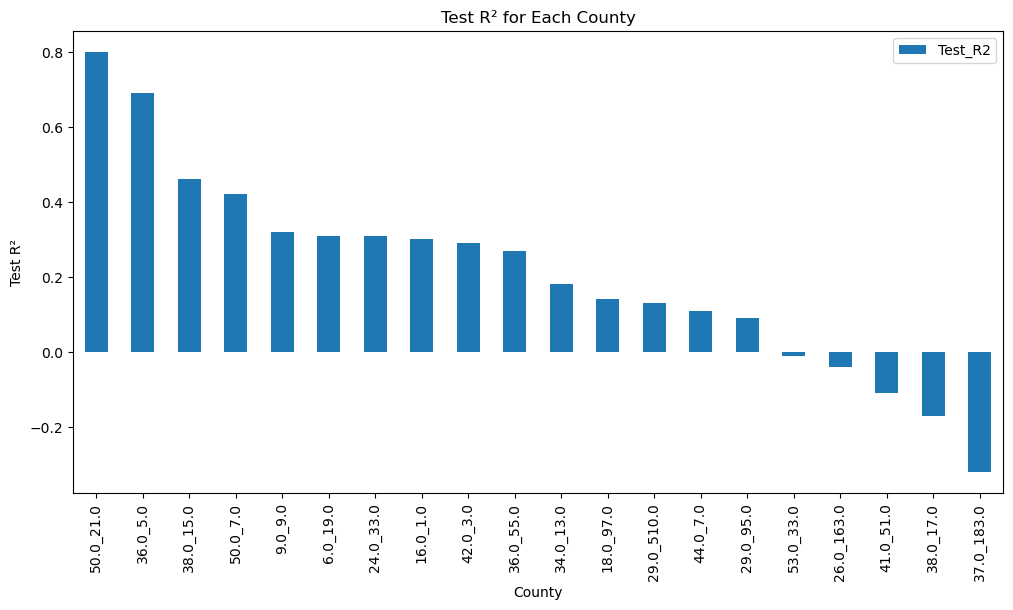

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load Data
data = pd.read_csv('/Users/HP/Desktop/Predicting Air Quality and Pollution/selected_counties_data.csv', parse_dates=['Date'])

# Step 2: Data Cleaning
data.fillna(method='ffill', inplace=True)
data.sort_values(by=['State Code', 'County Code', 'Date'], inplace=True)

# Step 3: Handling Variability Across Counties
county_groups = data.groupby(['State Code', 'County Code'])

def preprocess_county(group):
    group = group.set_index('Date').resample('D').mean()
    group.interpolate(method='linear', inplace=True)
    return group.reset_index()

data_preprocessed = county_groups.apply(preprocess_county)
data_preprocessed.reset_index(drop=True, inplace=True)

# Create lag features for the past 3 days
for lag in range(1, 4):
    data_preprocessed[f'AQI_lag{lag}'] = data_preprocessed.groupby(['State Code', 'County Code'])['AQI'].shift(lag)

data_preprocessed['AQI_rolling_7'] = (
    data_preprocessed.groupby(['State Code', 'County Code'])['AQI']
    .rolling(window=7).mean().reset_index(level=[0, 1], drop=True)
)

data_preprocessed.dropna(inplace=True)

# Step 4: Train Models with LSTM
results = []

# Scaling function
scaler = MinMaxScaler()

# Set the number of time steps for the LSTM
time_steps = 7

for (state_code, county_code), group in data_preprocessed.groupby(['State Code', 'County Code']):
    X = group[['AQI_lag1', 'AQI_lag2', 'AQI_lag3', 'AQI_rolling_7', 'CO', 'DP', 'NO2', 'PM10', 'PM2.5', 'RH', 'SO2', 'TEMP', 'WD', 'WS']]
    y = group['AQI']

    # Scale the data
    X_scaled = scaler.fit_transform(X)
    
    # Prepare data with sequences of 7 steps
    X_lstm, y_lstm = [], []
    for i in range(time_steps, len(X_scaled)):
        X_lstm.append(X_scaled[i - time_steps:i])  # The previous 7 time steps
        y_lstm.append(y.iloc[i])  # The target at time step 'i'

    # Convert lists to arrays
    X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

    # Split data: 75% train, 25% test
    train_size = int(len(X_lstm) * 0.75)
    X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
    y_train, y_test = y_lstm[:train_size], y_lstm[train_size:]

    # Step 4.1: Define the LSTM Model
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

    # Make predictions
    y_pred_train = model.predict(X_train).flatten()
    y_pred_test = model.predict(X_test).flatten()

    # Calculate R² and RMSE
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Store results
    results.append({
        'County': f'{state_code}_{county_code}',
        'Train_R2': round(train_r2, 2),
        'Test_R2': round(test_r2, 2),
        'Train_RMSE': round(train_rmse, 2),
        'Test_RMSE': round(test_rmse, 2)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame for inspection
print("Results DataFrame:")
print(results_df)

# Calculate and display average R² and RMSE across all counties
average_metrics = results_df[['Train_R2', 'Test_R2', 'Train_RMSE', 'Test_RMSE']].mean().round(2).to_dict()

print("\nAverage Metrics Across All Counties:")
print(average_metrics)

# Plot Test R² for each county
results_df.sort_values(by='Test_R2', ascending=False).plot(kind='bar', x='County', y='Test_R2', figsize=(12, 6))
plt.title('Test R² for Each County')
plt.ylabel('Test R²')
plt.show()


## Best Case. Time steps = 7, LSTM layers = 2, Epoch = 50, Batch size = 32

/var/folders/63/l487hncs0sx_mcz7h3t_bxmc0000gn/T/ipykernel_74531/1401678578.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

Epoch 1/100
109/109 [==============================] - 1s 6ms/step - loss: 2787.0835 - val_loss: 1012.6726
Epoch 2/100
109/109 [==============================] - 1s 5ms/step - loss: 1122.4242 - val_loss: 1073.8160
Epoch 3/100
109/109 [==============================] - 1s 5ms/step - loss: 1111.6990 - val_loss: 1006.8787
Epoch 4/100
109/109 [==============================] - 1s 5ms/step - loss: 1104.4674 - val_loss: 1116.2180
Epoch 5/100
109/109 [==============================] - 1s 5ms/step - loss: 1122.5480 - val_loss: 1004.7626
Epoch 6/100
109/109 [==============================] - 1s 5ms/step - loss: 1025.9744 - val_loss: 995.0484
Epoch 7/100
109/109 [==============================] - 1s 5ms/step - loss: 1048.0479 - val_loss: 1012.8507
Epoch 8/100
109/109 [==============================] - 1s 5ms/step - loss: 1020.8969 - val_loss: 989.1655
Epoch 9/100
109/109 [==============================] - 1s 5ms/step - loss: 1060.4872 - val_loss: 952.1264
Epoch 10/100
109/109 [==================

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
109/109 [==============================] - 1s 5ms/step - loss: 931.6025 - val_loss: 539.6027
Epoch 2/100
109/109 [==============================] - 0s 4ms/step - loss: 397.5366 - val_loss: 500.5713
Epoch 3/100
109/109 [==============================] - 0s 4ms/step - loss: 392.6235 - val_loss: 522.3303
Epoch 4/100
109/109 [==============================] - 0s 4ms/step - loss: 383.4139 - val_loss: 531.2181
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 384.7835 - val_loss: 469.8058
Epoch 6/100
109/109 [==============================] - 0s 4ms/step - loss: 379.0323 - val_loss: 482.8700
Epoch 7/100
109/109 [==============================] - 0s 4ms/step - loss: 368.6497 - val_loss: 487.6198
Epoch 8/100
109/109 [==============================] - 0s 4ms/step - loss: 364.4561 - val_loss: 467.0415
Epoch 9/100
109/109 [==============================] - 0s 4ms/step - loss: 376.8567 - val_loss: 463.7631
Epoch 10/100
109/109 [==============================] -

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
109/109 [==============================] - 1s 5ms/step - loss: 681.9272 - val_loss: 397.1540
Epoch 2/100
109/109 [==============================] - 0s 4ms/step - loss: 158.5415 - val_loss: 399.1510
Epoch 3/100
109/109 [==============================] - 0s 4ms/step - loss: 142.1626 - val_loss: 323.3269
Epoch 4/100
109/109 [==============================] - 1s 5ms/step - loss: 135.8484 - val_loss: 298.4863
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 136.8818 - val_loss: 282.5251
Epoch 6/100
109/109 [==============================] - 0s 4ms/step - loss: 127.3662 - val_loss: 319.5091
Epoch 7/100
109/109 [==============================] - 0s 4ms/step - loss: 129.8367 - val_loss: 270.1787
Epoch 8/100
109/109 [==============================] - 0s 4ms/step - loss: 122.6737 - val_loss: 261.6142
Epoch 9/100
109/109 [==============================] - 0s 4ms/step - loss: 116.4339 - val_loss: 247.4969
Epoch 10/100
109/109 [==============================] -

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
109/109 [==============================] - 1s 5ms/step - loss: 1000.5564 - val_loss: 307.2053
Epoch 2/100
109/109 [==============================] - 0s 4ms/step - loss: 268.6116 - val_loss: 388.2097
Epoch 3/100
109/109 [==============================] - 0s 4ms/step - loss: 260.3885 - val_loss: 294.0118
Epoch 4/100
109/109 [==============================] - 0s 5ms/step - loss: 258.1326 - val_loss: 313.8243
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 247.4384 - val_loss: 319.3249
Epoch 6/100
109/109 [==============================] - 0s 4ms/step - loss: 250.9497 - val_loss: 286.3590
Epoch 7/100
109/109 [==============================] - 0s 4ms/step - loss: 250.0555 - val_loss: 361.5390
Epoch 8/100
109/109 [==============================] - 0s 4ms/step - loss: 244.0775 - val_loss: 296.3994
Epoch 9/100
109/109 [==============================] - 0s 4ms/step - loss: 239.5023 - val_loss: 283.6541
Epoch 10/100
109/109 [==============================] 

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
109/109 [==============================] - 1s 5ms/step - loss: 773.2986 - val_loss: 175.0336
Epoch 2/100
109/109 [==============================] - 0s 4ms/step - loss: 178.1539 - val_loss: 161.9262
Epoch 3/100
109/109 [==============================] - 0s 4ms/step - loss: 167.2503 - val_loss: 161.0661
Epoch 4/100
109/109 [==============================] - 0s 4ms/step - loss: 167.9617 - val_loss: 159.1314
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 161.1307 - val_loss: 173.4102
Epoch 6/100
109/109 [==============================] - 0s 4ms/step - loss: 163.2526 - val_loss: 162.8632
Epoch 7/100
109/109 [==============================] - 0s 4ms/step - loss: 156.3637 - val_loss: 174.0461
Epoch 8/100
109/109 [==============================] - 0s 4ms/step - loss: 156.0761 - val_loss: 156.6607
Epoch 9/100
109/109 [==============================] - 0s 4ms/step - loss: 151.4779 - val_loss: 149.5928
Epoch 10/100
109/109 [==============================] -

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
109/109 [==============================] - 1s 5ms/step - loss: 1180.5366 - val_loss: 486.9743
Epoch 2/100
109/109 [==============================] - 0s 4ms/step - loss: 342.6416 - val_loss: 375.0046
Epoch 3/100
109/109 [==============================] - 0s 4ms/step - loss: 330.5740 - val_loss: 352.7967
Epoch 4/100
109/109 [==============================] - 0s 4ms/step - loss: 324.6429 - val_loss: 311.4171
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 346.6752 - val_loss: 353.0636
Epoch 6/100
109/109 [==============================] - 0s 4ms/step - loss: 308.6487 - val_loss: 291.7904
Epoch 7/100
109/109 [==============================] - 0s 4ms/step - loss: 309.0265 - val_loss: 341.4873
Epoch 8/100
109/109 [==============================] - 0s 4ms/step - loss: 310.1944 - val_loss: 310.7719
Epoch 9/100
109/109 [==============================] - 0s 4ms/step - loss: 303.3254 - val_loss: 319.7612
Epoch 10/100
109/109 [==============================] 

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
100/100 [==============================] - 1s 6ms/step - loss: 773.6252 - val_loss: 317.0621
Epoch 2/100
100/100 [==============================] - 1s 5ms/step - loss: 194.5487 - val_loss: 234.2632
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 186.8423 - val_loss: 228.0007
Epoch 4/100
100/100 [==============================] - 0s 5ms/step - loss: 182.5609 - val_loss: 221.5956
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 188.4568 - val_loss: 216.9923
Epoch 6/100
100/100 [==============================] - 1s 5ms/step - loss: 180.9035 - val_loss: 220.3580
Epoch 7/100
100/100 [==============================] - 0s 5ms/step - loss: 173.7727 - val_loss: 217.3978
Epoch 8/100
100/100 [==============================] - 1s 5ms/step - loss: 177.4885 - val_loss: 210.6769
Epoch 9/100
100/100 [==============================] - 1s 5ms/step - loss: 178.1791 - val_loss: 209.8082
Epoch 10/100
100/100 [==============================] -

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
109/109 [==============================] - 1s 5ms/step - loss: 953.3914 - val_loss: 320.7371
Epoch 2/100
109/109 [==============================] - 0s 4ms/step - loss: 276.5186 - val_loss: 256.6598
Epoch 3/100
109/109 [==============================] - 0s 4ms/step - loss: 260.8115 - val_loss: 252.7380
Epoch 4/100
109/109 [==============================] - 0s 4ms/step - loss: 254.4182 - val_loss: 251.2969
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 257.3370 - val_loss: 312.1362
Epoch 6/100
109/109 [==============================] - 0s 4ms/step - loss: 259.4017 - val_loss: 251.7410
Epoch 7/100
109/109 [==============================] - 0s 4ms/step - loss: 251.5098 - val_loss: 270.6207
Epoch 8/100
109/109 [==============================] - 0s 4ms/step - loss: 249.6046 - val_loss: 246.1925
Epoch 9/100
109/109 [==============================] - 0s 4ms/step - loss: 245.0129 - val_loss: 251.2799
Epoch 10/100
109/109 [==============================] -

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
78/78 [==============================] - 1s 6ms/step - loss: 776.3406 - val_loss: 80.9225
Epoch 2/100
78/78 [==============================] - 0s 4ms/step - loss: 117.6940 - val_loss: 162.9392
Epoch 3/100
78/78 [==============================] - 0s 4ms/step - loss: 105.1968 - val_loss: 78.5810
Epoch 4/100
78/78 [==============================] - 0s 4ms/step - loss: 97.5072 - val_loss: 42.5883
Epoch 5/100
78/78 [==============================] - 0s 4ms/step - loss: 95.5759 - val_loss: 115.9287
Epoch 6/100
78/78 [==============================] - 0s 4ms/step - loss: 82.3466 - val_loss: 162.1447
Epoch 7/100
78/78 [==============================] - 0s 4ms/step - loss: 84.2443 - val_loss: 51.8362
Epoch 8/100
78/78 [==============================] - 0s 4ms/step - loss: 78.8600 - val_loss: 117.0563
Epoch 9/100
78/78 [==============================] - 0s 5ms/step - loss: 79.4060 - val_loss: 106.6618
Epoch 10/100
78/78 [==============================] - 0s 4ms/step - loss: 76.3036 -

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
43/43 [==============================] - 1s 7ms/step - loss: 1462.3873 - val_loss: 190.5974
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 269.8451 - val_loss: 84.8553
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 216.2710 - val_loss: 99.6685
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 219.6680 - val_loss: 87.7986
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 200.2034 - val_loss: 57.3105
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 172.2997 - val_loss: 64.5429
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 157.9424 - val_loss: 59.8018
Epoch 8/100
43/43 [==============================] - 0s 5ms/step - loss: 144.4900 - val_loss: 63.8564
Epoch 9/100
43/43 [==============================] - 0s 5ms/step - loss: 156.4044 - val_loss: 48.6625
Epoch 10/100
43/43 [==============================] - 0s 4ms/step - loss: 122.97

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
60/60 [==============================] - 1s 6ms/step - loss: 775.9685 - val_loss: 59.0517
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 100.3339 - val_loss: 63.6991
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 83.3129 - val_loss: 111.8692
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 78.7227 - val_loss: 59.4946
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 64.5857 - val_loss: 87.3058
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 61.2420 - val_loss: 119.9074
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 63.7282 - val_loss: 75.2747
Epoch 8/100
60/60 [==============================] - 0s 4ms/step - loss: 57.4736 - val_loss: 93.2470
Epoch 9/100
60/60 [==============================] - 0s 4ms/step - loss: 53.0291 - val_loss: 83.6602
Epoch 10/100
60/60 [==============================] - 0s 4ms/step - loss: 52.4768 - val

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 2364.1755 - val_loss: 1865.4884
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 550.9931 - val_loss: 354.2981
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 218.1050 - val_loss: 323.7137
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 171.9875 - val_loss: 244.5888
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 163.4498 - val_loss: 249.9849
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 150.2273 - val_loss: 266.2124
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 138.9427 - val_loss: 219.4649
Epoch 8/100
21/21 [==============================] - 0s 5ms/step - loss: 137.3880 - val_loss: 272.4020
Epoch 9/100
21/21 [==============================] - 0s 5ms/step - loss: 114.2540 - val_loss: 230.2657
Epoch 10/100
21/21 [==============================] - 0s 5ms/step - lo

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
102/102 [==============================] - 1s 6ms/step - loss: 688.6174 - val_loss: 548.0817
Epoch 2/100
102/102 [==============================] - 0s 4ms/step - loss: 222.5838 - val_loss: 528.2597
Epoch 3/100
102/102 [==============================] - 0s 4ms/step - loss: 226.6397 - val_loss: 504.8513
Epoch 4/100
102/102 [==============================] - 0s 4ms/step - loss: 208.6427 - val_loss: 497.3125
Epoch 5/100
102/102 [==============================] - 0s 4ms/step - loss: 202.2798 - val_loss: 503.5800
Epoch 6/100
102/102 [==============================] - 0s 4ms/step - loss: 203.9439 - val_loss: 557.6720
Epoch 7/100
102/102 [==============================] - 0s 4ms/step - loss: 205.6620 - val_loss: 496.3975
Epoch 8/100
102/102 [==============================] - 0s 4ms/step - loss: 199.8419 - val_loss: 497.4608
Epoch 9/100
102/102 [==============================] - 0s 4ms/step - loss: 193.6480 - val_loss: 500.6666
Epoch 10/100
102/102 [==============================] -

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
6/6 [==============================] - 1s 32ms/step - loss: 2833.1729 - val_loss: 2231.7510
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 2817.2317 - val_loss: 2205.1975
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 2730.6748 - val_loss: 2001.1019
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 1683.7028 - val_loss: 141.0230
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 533.7380 - val_loss: 443.3115
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 340.0171 - val_loss: 129.3247
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 291.2879 - val_loss: 177.1966
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 213.5452 - val_loss: 109.6706
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 179.2065 - val_loss: 107.5794
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 158.0276 - 

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
69/69 [==============================] - 1s 6ms/step - loss: 886.1286 - val_loss: 109.1323
Epoch 2/100
69/69 [==============================] - 0s 5ms/step - loss: 28.2926 - val_loss: 97.6952
Epoch 3/100
69/69 [==============================] - 0s 5ms/step - loss: 25.8775 - val_loss: 147.4803
Epoch 4/100
69/69 [==============================] - 0s 5ms/step - loss: 22.0737 - val_loss: 113.7846
Epoch 5/100
69/69 [==============================] - 0s 5ms/step - loss: 19.3776 - val_loss: 105.4861
Epoch 6/100
69/69 [==============================] - 0s 5ms/step - loss: 19.1522 - val_loss: 118.0997
Epoch 7/100
69/69 [==============================] - 0s 5ms/step - loss: 20.7440 - val_loss: 122.7927
Epoch 8/100
69/69 [==============================] - 0s 5ms/step - loss: 18.2675 - val_loss: 141.2103
Epoch 9/100
69/69 [==============================] - 0s 5ms/step - loss: 16.6304 - val_loss: 174.8640
Epoch 10/100
69/69 [==============================] - 0s 5ms/step - loss: 16.0343 

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100


109/109 [==============================] - 6s 5ms/step - loss: 1238.2253 - val_loss: 433.2192
Epoch 2/100
109/109 [==============================] - 0s 4ms/step - loss: 391.1250 - val_loss: 380.1806
Epoch 3/100
109/109 [==============================] - 0s 4ms/step - loss: 389.5067 - val_loss: 370.5316
Epoch 4/100
109/109 [==============================] - 0s 4ms/step - loss: 356.8559 - val_loss: 366.0796
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 372.9199 - val_loss: 367.5312
Epoch 6/100
109/109 [==============================] - 0s 4ms/step - loss: 355.3728 - val_loss: 362.5030
Epoch 7/100
109/109 [==============================] - 0s 4ms/step - loss: 352.4635 - val_loss: 361.3119
Epoch 8/100
109/109 [==============================] - 0s 4ms/step - loss: 359.1907 - val_loss: 358.6681
Epoch 9/100
109/109 [==============================] - 0s 4ms/step - loss: 351.8661 - val_loss: 356.9213
Epoch 10/100
109/109 [==============================] - 0s 4ms/ste

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
109/109 [==============================] - 1s 5ms/step - loss: 648.5598 - val_loss: 169.9351
Epoch 2/100
109/109 [==============================] - 0s 4ms/step - loss: 130.6678 - val_loss: 170.6921
Epoch 3/100
109/109 [==============================] - 0s 4ms/step - loss: 128.7091 - val_loss: 271.0959
Epoch 4/100
109/109 [==============================] - 0s 4ms/step - loss: 123.1169 - val_loss: 160.0580
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 118.0815 - val_loss: 169.4769
Epoch 6/100
109/109 [==============================] - 0s 4ms/step - loss: 104.8513 - val_loss: 174.8355
Epoch 7/100
109/109 [==============================] - 0s 4ms/step - loss: 106.3737 - val_loss: 238.4086
Epoch 8/100
109/109 [==============================] - 0s 4ms/step - loss: 100.6185 - val_loss: 153.9897
Epoch 9/100
109/109 [==============================] - 0s 4ms/step - loss: 94.0171 - val_loss: 173.4960
Epoch 10/100
109/109 [==============================] - 

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
82/82 [==============================] - 1s 6ms/step - loss: 623.4620 - val_loss: 87.2505
Epoch 2/100
82/82 [==============================] - 0s 4ms/step - loss: 113.8117 - val_loss: 103.6654
Epoch 3/100
82/82 [==============================] - 0s 4ms/step - loss: 103.1994 - val_loss: 67.5805
Epoch 4/100
82/82 [==============================] - 0s 4ms/step - loss: 96.0565 - val_loss: 70.5450
Epoch 5/100
82/82 [==============================] - 0s 4ms/step - loss: 95.1208 - val_loss: 78.7846
Epoch 6/100
82/82 [==============================] - 0s 4ms/step - loss: 91.9249 - val_loss: 82.9587
Epoch 7/100
82/82 [==============================] - 0s 4ms/step - loss: 89.5753 - val_loss: 70.2745
Epoch 8/100
82/82 [==============================] - 0s 4ms/step - loss: 91.2967 - val_loss: 59.1371
Epoch 9/100
82/82 [==============================] - 0s 5ms/step - loss: 85.1108 - val_loss: 55.1864
Epoch 10/100
82/82 [==============================] - 0s 4ms/step - loss: 85.8568 - val

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
82/82 [==============================] - 1s 6ms/step - loss: 627.8740 - val_loss: 86.8126
Epoch 2/100
82/82 [==============================] - 0s 5ms/step - loss: 121.0759 - val_loss: 77.2348
Epoch 3/100
82/82 [==============================] - 0s 4ms/step - loss: 109.6539 - val_loss: 71.0640
Epoch 4/100
82/82 [==============================] - 0s 4ms/step - loss: 99.9202 - val_loss: 61.8129
Epoch 5/100
82/82 [==============================] - 0s 4ms/step - loss: 89.5184 - val_loss: 48.4059
Epoch 6/100
82/82 [==============================] - 0s 4ms/step - loss: 81.3972 - val_loss: 80.9029
Epoch 7/100
82/82 [==============================] - 0s 4ms/step - loss: 85.2099 - val_loss: 55.4470
Epoch 8/100
82/82 [==============================] - 0s 4ms/step - loss: 71.7497 - val_loss: 47.3299
Epoch 9/100
82/82 [==============================] - 0s 4ms/step - loss: 64.1478 - val_loss: 48.2649
Epoch 10/100
82/82 [==============================] - 0s 4ms/step - loss: 62.7772 - val_

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/100
82/82 [==============================] - 1s 6ms/step - loss: 1019.5299 - val_loss: 108.7625
Epoch 2/100
82/82 [==============================] - 0s 4ms/step - loss: 250.6114 - val_loss: 91.6886
Epoch 3/100
82/82 [==============================] - 0s 5ms/step - loss: 232.9365 - val_loss: 104.7452
Epoch 4/100
82/82 [==============================] - 0s 5ms/step - loss: 224.6023 - val_loss: 106.7253
Epoch 5/100
82/82 [==============================] - 0s 4ms/step - loss: 196.6703 - val_loss: 96.5806
Epoch 6/100
82/82 [==============================] - 0s 5ms/step - loss: 198.2513 - val_loss: 90.9515
Epoch 7/100
82/82 [==============================] - 0s 5ms/step - loss: 194.0504 - val_loss: 83.9947
Epoch 8/100
82/82 [==============================] - 0s 4ms/step - loss: 184.1291 - val_loss: 84.7842
Epoch 9/100
82/82 [==============================] - 0s 4ms/step - loss: 156.2589 - val_loss: 82.0069
Epoch 10/100
82/82 [==============================] - 0s 4ms/step - loss: 161.

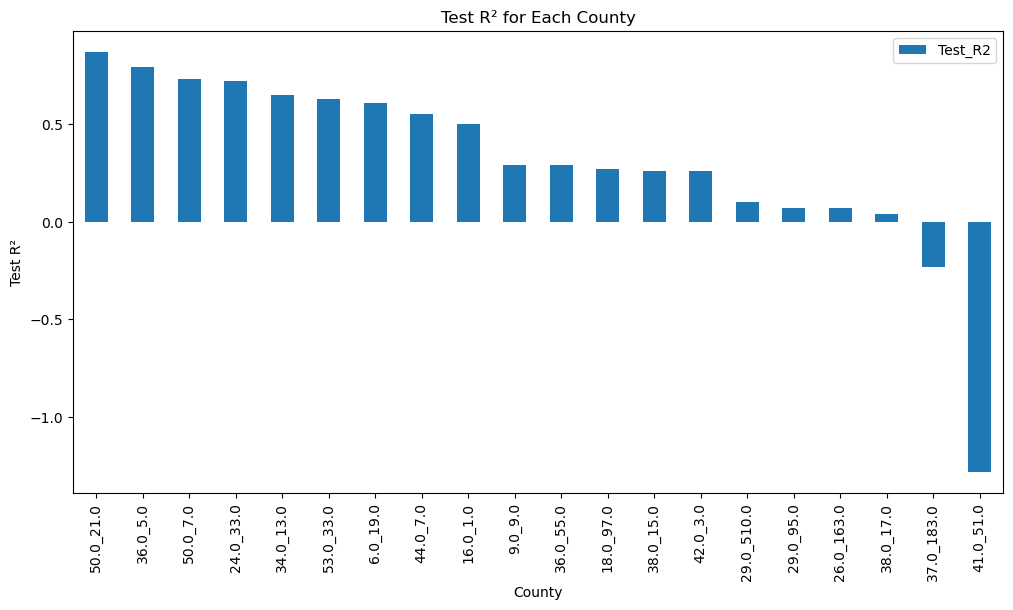

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load Data
data = pd.read_csv('/Users/HP/Desktop/Predicting Air Quality and Pollution/selected_counties_data.csv', parse_dates=['Date'])

# Step 2: Data Cleaning
data.fillna(method='ffill', inplace=True)
data.sort_values(by=['State Code', 'County Code', 'Date'], inplace=True)

# Step 3: Handling Variability Across Counties
county_groups = data.groupby(['State Code', 'County Code'])

def preprocess_county(group):
    group = group.set_index('Date').resample('D').mean()
    group.interpolate(method='linear', inplace=True)
    return group.reset_index()

data_preprocessed = county_groups.apply(preprocess_county)
data_preprocessed.reset_index(drop=True, inplace=True)

# Create lag features for the past 3 days
for lag in range(1, 4):
    data_preprocessed[f'AQI_lag{lag}'] = data_preprocessed.groupby(['State Code', 'County Code'])['AQI'].shift(lag)

data_preprocessed['AQI_rolling_7'] = (
    data_preprocessed.groupby(['State Code', 'County Code'])['AQI']
    .rolling(window=7).mean().reset_index(level=[0, 1], drop=True)
)

data_preprocessed.dropna(inplace=True)

# Step 4: Train Models with LSTM
results = []

# Scaling function
scaler = MinMaxScaler()

# Set the number of time steps for the LSTM
time_steps = 7

for (state_code, county_code), group in data_preprocessed.groupby(['State Code', 'County Code']):
    X = group[['AQI_lag1', 'AQI_lag2', 'AQI_lag3', 'AQI_rolling_7', 'CO', 'DP', 'NO2', 'PM10', 'PM2.5', 'RH', 'SO2', 'TEMP', 'WD', 'WS']]
    y = group['AQI']

    # Scale the data
    X_scaled = scaler.fit_transform(X)
    
    # Prepare data with sequences of 7 steps
    X_lstm, y_lstm = [], []
    for i in range(time_steps, len(X_scaled)):
        X_lstm.append(X_scaled[i - time_steps:i])  # The previous 7 time steps
        y_lstm.append(y.iloc[i])  # The target at time step 'i'

    # Convert lists to arrays
    X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

    # Split data: 75% train, 25% test
    train_size = int(len(X_lstm) * 0.75)
    X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
    y_train, y_test = y_lstm[:train_size], y_lstm[train_size:]

    # Step 4.1: Define the LSTM Model
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

    # Make predictions
    y_pred_train = model.predict(X_train).flatten()
    y_pred_test = model.predict(X_test).flatten()

    # Calculate R² and RMSE
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Store results
    results.append({
        'County': f'{state_code}_{county_code}',
        'Train_R2': round(train_r2, 2),
        'Test_R2': round(test_r2, 2),
        'Train_RMSE': round(train_rmse, 2),
        'Test_RMSE': round(test_rmse, 2)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame for inspection
print("Results DataFrame:")
print(results_df)

# Calculate and display average R² and RMSE across all counties
average_metrics = results_df[['Train_R2', 'Test_R2', 'Train_RMSE', 'Test_RMSE']].mean().round(2).to_dict()

print("\nAverage Metrics Across All Counties:")
print(average_metrics)

# Plot Test R² for each county
results_df.sort_values(by='Test_R2', ascending=False).plot(kind='bar', x='County', y='Test_R2', figsize=(12, 6))
plt.title('Test R² for Each County')
plt.ylabel('Test R²')
plt.show()


# Time steps = 4, LSTM layers = 2

/var/folders/63/l487hncs0sx_mcz7h3t_bxmc0000gn/T/ipykernel_74531/3307445768.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

Epoch 1/50
110/110 [==============================] - 1s 2ms/step - loss: 4462.1719 - val_loss: 1039.1951
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 1123.9484 - val_loss: 1048.8938
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 1145.7476 - val_loss: 1048.6399
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 1137.6709 - val_loss: 1008.9897
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 1134.5021 - val_loss: 986.9307
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 1110.5929 - val_loss: 1015.6411
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 1040.3080 - val_loss: 1017.1842
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 1075.7344 - val_loss: 955.8989
Epoch 9/50
110/110 [==============================] - 0s 1ms/step - loss: 999.6545 - val_loss: 931.0559
Epoch 10/50
110/110 [=============================

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
110/110 [==============================] - 1s 2ms/step - loss: 1447.5759 - val_loss: 557.3522
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 466.1997 - val_loss: 540.4597
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 445.6574 - val_loss: 488.5406
Epoch 4/50
110/110 [==============================] - 0s 2ms/step - loss: 433.0716 - val_loss: 484.4512
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 440.2920 - val_loss: 498.9162
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 418.3600 - val_loss: 471.2433
Epoch 7/50
110/110 [==============================] - 0s 2ms/step - loss: 431.7986 - val_loss: 479.9801
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 408.6106 - val_loss: 467.2465
Epoch 9/50
110/110 [==============================] - 0s 1ms/step - loss: 411.3985 - val_loss: 518.4425
Epoch 10/50
110/110 [==============================] - 0s 1ms/s

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
110/110 [==============================] - 1s 2ms/step - loss: 930.6617 - val_loss: 315.5131
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 173.1398 - val_loss: 280.6457
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 168.7463 - val_loss: 261.3681
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 172.4922 - val_loss: 302.7563
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 150.8154 - val_loss: 283.8853
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 143.6474 - val_loss: 275.5410
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 135.2861 - val_loss: 239.3008
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 141.6208 - val_loss: 224.8484
Epoch 9/50
110/110 [==============================] - 0s 1ms/step - loss: 140.1480 - val_loss: 229.6368
Epoch 10/50
110/110 [==============================] - 0s 1ms/st

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
110/110 [==============================] - 1s 2ms/step - loss: 1644.8435 - val_loss: 347.9513
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 368.1105 - val_loss: 351.9486
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 361.2908 - val_loss: 356.1184
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 343.6906 - val_loss: 307.3283
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 339.8165 - val_loss: 325.6454
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 323.5381 - val_loss: 308.9852
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 314.9987 - val_loss: 303.4243
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 311.3904 - val_loss: 312.7862
Epoch 9/50
110/110 [==============================] - 0s 1ms/step - loss: 309.7271 - val_loss: 286.0293
Epoch 10/50
110/110 [==============================] - 0s 1ms/s

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
110/110 [==============================] - 1s 2ms/step - loss: 1022.5394 - val_loss: 182.1056
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 218.6421 - val_loss: 173.4844
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 207.1234 - val_loss: 170.6259
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 205.5665 - val_loss: 162.2976
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 193.6312 - val_loss: 171.2579
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 187.3260 - val_loss: 160.3031
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 177.9701 - val_loss: 154.9248
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 178.3136 - val_loss: 160.3143
Epoch 9/50
110/110 [==============================] - 0s 1ms/step - loss: 184.3318 - val_loss: 146.5259
Epoch 10/50
110/110 [==============================] - 0s 1ms/s

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
110/110 [==============================] - 1s 2ms/step - loss: 1754.9395 - val_loss: 425.8567
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 450.8475 - val_loss: 345.1054
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 419.1239 - val_loss: 314.2483
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 405.3564 - val_loss: 301.2247
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 384.3719 - val_loss: 311.9590
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 368.0041 - val_loss: 428.5192
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 364.2376 - val_loss: 290.7911
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 361.7734 - val_loss: 291.6294
Epoch 9/50
110/110 [==============================] - 0s 1ms/step - loss: 351.8559 - val_loss: 334.0631
Epoch 10/50
110/110 [==============================] - 0s 1ms/s

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
100/100 [==============================] - 1s 2ms/step - loss: 1059.0927 - val_loss: 258.4002
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 261.9699 - val_loss: 236.0492
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 242.4408 - val_loss: 235.6783
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 230.3875 - val_loss: 247.2086
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 221.0604 - val_loss: 226.8038
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 216.0365 - val_loss: 242.0291
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 222.0593 - val_loss: 207.5701
Epoch 8/50
100/100 [==============================] - 0s 1ms/step - loss: 205.7734 - val_loss: 204.9502
Epoch 9/50
100/100 [==============================] - 0s 1ms/step - loss: 212.9396 - val_loss: 203.4805
Epoch 10/50
100/100 [==============================] - 0s 1ms/s

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
110/110 [==============================] - 1s 2ms/step - loss: 1449.9966 - val_loss: 313.9148
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 393.4127 - val_loss: 292.3044
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 341.9986 - val_loss: 286.7701
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 335.9135 - val_loss: 293.9541
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 326.3462 - val_loss: 263.0772
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 319.7156 - val_loss: 257.7714
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 301.9645 - val_loss: 263.0042
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 311.7484 - val_loss: 250.5467
Epoch 9/50
110/110 [==============================] - 0s 1ms/step - loss: 302.9004 - val_loss: 249.1466
Epoch 10/50
110/110 [==============================] - 0s 1ms/s

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
78/78 [==============================] - 1s 3ms/step - loss: 1361.7938 - val_loss: 11.8037
Epoch 2/50
78/78 [==============================] - 0s 1ms/step - loss: 191.4187 - val_loss: 53.6696
Epoch 3/50
78/78 [==============================] - 0s 1ms/step - loss: 156.4971 - val_loss: 97.1500
Epoch 4/50
78/78 [==============================] - 0s 1ms/step - loss: 150.1988 - val_loss: 117.5472
Epoch 5/50
78/78 [==============================] - 0s 1ms/step - loss: 142.5710 - val_loss: 135.2295
Epoch 6/50
78/78 [==============================] - 0s 1ms/step - loss: 137.8083 - val_loss: 56.3887
Epoch 7/50
78/78 [==============================] - 0s 1ms/step - loss: 133.9235 - val_loss: 95.8465
Epoch 8/50
78/78 [==============================] - 0s 1ms/step - loss: 127.5712 - val_loss: 94.7538
Epoch 9/50
78/78 [==============================] - 0s 1ms/step - loss: 121.1315 - val_loss: 100.8554
Epoch 10/50
78/78 [==============================] - 0s 1ms/step - loss: 113.7391 - val

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
43/43 [==============================] - 1s 4ms/step - loss: 2121.9138 - val_loss: 717.1562
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 387.6300 - val_loss: 155.5171
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 237.5468 - val_loss: 87.3942
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 227.6963 - val_loss: 95.9671
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 219.7350 - val_loss: 129.9075
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 197.5150 - val_loss: 78.6271
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 196.1984 - val_loss: 77.9578
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 201.0019 - val_loss: 67.5149
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 190.8046 - val_loss: 92.2690
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 176.2418 - val

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
60/60 [==============================] - 1s 3ms/step - loss: 1538.2733 - val_loss: 110.0470
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 203.1957 - val_loss: 42.1323
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 153.3770 - val_loss: 40.6857
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 135.4506 - val_loss: 62.1578
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 118.7199 - val_loss: 59.9290
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 108.6834 - val_loss: 46.8971
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 94.9600 - val_loss: 50.2386
Epoch 8/50
60/60 [==============================] - 0s 1ms/step - loss: 85.7343 - val_loss: 46.2659
Epoch 9/50
60/60 [==============================] - 0s 1ms/step - loss: 77.9044 - val_loss: 49.9937
Epoch 10/50
60/60 [==============================] - 0s 1ms/step - loss: 70.6004 - val_loss:

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
21/21 [==============================] - 1s 7ms/step - loss: 2397.0952 - val_loss: 2902.1245
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 1938.4799 - val_loss: 674.3766
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 372.8974 - val_loss: 328.8503
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 262.6842 - val_loss: 267.0854
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 264.0577 - val_loss: 259.6007
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 222.0689 - val_loss: 239.6419
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 216.2330 - val_loss: 291.9305
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 225.6937 - val_loss: 269.6872
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 193.9789 - val_loss: 278.0081
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 184.11

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
102/102 [==============================] - 1s 2ms/step - loss: 984.2950 - val_loss: 533.4538
Epoch 2/50
102/102 [==============================] - 0s 1ms/step - loss: 251.9111 - val_loss: 498.1054
Epoch 3/50
102/102 [==============================] - 0s 1ms/step - loss: 248.6189 - val_loss: 472.5919
Epoch 4/50
102/102 [==============================] - 0s 1ms/step - loss: 221.3667 - val_loss: 452.6320
Epoch 5/50
102/102 [==============================] - 0s 1ms/step - loss: 223.7635 - val_loss: 447.5709
Epoch 6/50
102/102 [==============================] - 0s 1ms/step - loss: 219.0486 - val_loss: 495.8902
Epoch 7/50
102/102 [==============================] - 0s 1ms/step - loss: 213.8802 - val_loss: 443.1199
Epoch 8/50
102/102 [==============================] - 0s 1ms/step - loss: 208.4796 - val_loss: 441.7242
Epoch 9/50
102/102 [==============================] - 0s 1ms/step - loss: 219.2849 - val_loss: 442.3235
Epoch 10/50
102/102 [==============================] - 0s 1ms/st

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
6/6 [==============================] - 1s 23ms/step - loss: 2875.1628 - val_loss: 2271.4795
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 2862.3044 - val_loss: 2257.4639
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 2839.5090 - val_loss: 2232.6838
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 2796.7991 - val_loss: 2178.8171
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 2679.1545 - val_loss: 2034.8333
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 2317.3699 - val_loss: 1578.4943
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1261.5991 - val_loss: 476.7332
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 605.4510 - val_loss: 318.5330
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 442.0678 - val_loss: 347.1029
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 340.5103 - val_

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
69/69 [==============================] - 1s 3ms/step - loss: 1852.6978 - val_loss: 289.5322
Epoch 2/50
69/69 [==============================] - 0s 1ms/step - loss: 145.0754 - val_loss: 117.4287
Epoch 3/50
69/69 [==============================] - 0s 1ms/step - loss: 100.7306 - val_loss: 93.7834
Epoch 4/50
69/69 [==============================] - 0s 1ms/step - loss: 88.7449 - val_loss: 100.6274
Epoch 5/50
69/69 [==============================] - 0s 1ms/step - loss: 81.6136 - val_loss: 94.7537
Epoch 6/50
69/69 [==============================] - 0s 1ms/step - loss: 77.2250 - val_loss: 95.7446
Epoch 7/50
69/69 [==============================] - 0s 1ms/step - loss: 73.2042 - val_loss: 101.0260
Epoch 8/50
69/69 [==============================] - 0s 1ms/step - loss: 72.4344 - val_loss: 96.8281
Epoch 9/50
69/69 [==============================] - 0s 1ms/step - loss: 68.9955 - val_loss: 102.8971
Epoch 10/50
69/69 [==============================] - 0s 1ms/step - loss: 63.9444 - val_loss

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
110/110 [==============================] - 2s 2ms/step - loss: 1815.2128 - val_loss: 464.3863
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 515.6194 - val_loss: 420.3547
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 461.9925 - val_loss: 412.2667
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 472.0370 - val_loss: 379.1306
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 435.5037 - val_loss: 373.5274
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 438.6874 - val_loss: 371.3444
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 435.3009 - val_loss: 372.8798
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 424.4818 - val_loss: 390.1877
Epoch 9/50
110/110 [==============================] - 0s 1ms/step - loss: 426.4853 - val_loss: 394.2216
Epoch 10/50
110/110 [==============================] - 0s 1ms/s

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
110/110 [==============================] - 1s 2ms/step - loss: 1018.7236 - val_loss: 227.5224
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 180.3201 - val_loss: 204.9148
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 162.3009 - val_loss: 176.8817
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 158.0255 - val_loss: 183.9538
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 146.4837 - val_loss: 169.9001
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 139.0727 - val_loss: 167.6412
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 130.1794 - val_loss: 164.2132
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 134.0845 - val_loss: 162.1683
Epoch 9/50
110/110 [==============================] - 0s 1ms/step - loss: 125.4644 - val_loss: 168.9037
Epoch 10/50
110/110 [==============================] - 0s 1ms/s

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
82/82 [==============================] - 1s 3ms/step - loss: 914.7627 - val_loss: 118.7292
Epoch 2/50
82/82 [==============================] - 0s 1ms/step - loss: 158.0432 - val_loss: 83.9963
Epoch 3/50
82/82 [==============================] - 0s 1ms/step - loss: 133.0522 - val_loss: 95.0985
Epoch 4/50
82/82 [==============================] - 0s 1ms/step - loss: 135.0497 - val_loss: 80.2277
Epoch 5/50
82/82 [==============================] - 0s 1ms/step - loss: 121.2289 - val_loss: 68.2104
Epoch 6/50
82/82 [==============================] - 0s 1ms/step - loss: 117.8487 - val_loss: 66.8768
Epoch 7/50
82/82 [==============================] - 0s 1ms/step - loss: 113.0353 - val_loss: 85.4498
Epoch 8/50
82/82 [==============================] - 0s 1ms/step - loss: 112.3354 - val_loss: 66.9004
Epoch 9/50
82/82 [==============================] - 0s 1ms/step - loss: 108.9885 - val_loss: 60.5529
Epoch 10/50
82/82 [==============================] - 0s 1ms/step - loss: 105.2962 - val_lo

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
82/82 [==============================] - 1s 3ms/step - loss: 1009.3823 - val_loss: 80.7806
Epoch 2/50
82/82 [==============================] - 0s 2ms/step - loss: 161.3236 - val_loss: 68.2570
Epoch 3/50
82/82 [==============================] - 0s 1ms/step - loss: 147.1009 - val_loss: 60.8145
Epoch 4/50
82/82 [==============================] - 0s 1ms/step - loss: 131.9569 - val_loss: 55.9406
Epoch 5/50
82/82 [==============================] - 0s 1ms/step - loss: 128.7453 - val_loss: 56.4573
Epoch 6/50
82/82 [==============================] - 0s 1ms/step - loss: 119.9669 - val_loss: 53.9861
Epoch 7/50
82/82 [==============================] - 0s 1ms/step - loss: 118.8237 - val_loss: 60.3609
Epoch 8/50
82/82 [==============================] - 0s 1ms/step - loss: 103.5208 - val_loss: 51.3891
Epoch 9/50
82/82 [==============================] - 0s 1ms/step - loss: 106.7784 - val_loss: 51.0923
Epoch 10/50
82/82 [==============================] - 0s 1ms/step - loss: 99.4591 - val_los

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

Epoch 1/50
82/82 [==============================] - 1s 3ms/step - loss: 1646.0155 - val_loss: 110.7368
Epoch 2/50
82/82 [==============================] - 0s 1ms/step - loss: 281.1911 - val_loss: 108.9015
Epoch 3/50
82/82 [==============================] - 0s 1ms/step - loss: 252.9976 - val_loss: 94.2733
Epoch 4/50
82/82 [==============================] - 0s 1ms/step - loss: 244.8851 - val_loss: 91.1779
Epoch 5/50
82/82 [==============================] - 0s 1ms/step - loss: 232.2428 - val_loss: 90.1965
Epoch 6/50
82/82 [==============================] - 0s 1ms/step - loss: 227.7480 - val_loss: 86.8708
Epoch 7/50
82/82 [==============================] - 0s 1ms/step - loss: 223.8589 - val_loss: 82.9695
Epoch 8/50
82/82 [==============================] - 0s 1ms/step - loss: 206.2316 - val_loss: 81.7772
Epoch 9/50
82/82 [==============================] - 0s 1ms/step - loss: 214.0103 - val_loss: 81.0830
Epoch 10/50
82/82 [==============================] - 0s 1ms/step - loss: 190.6288 - val_

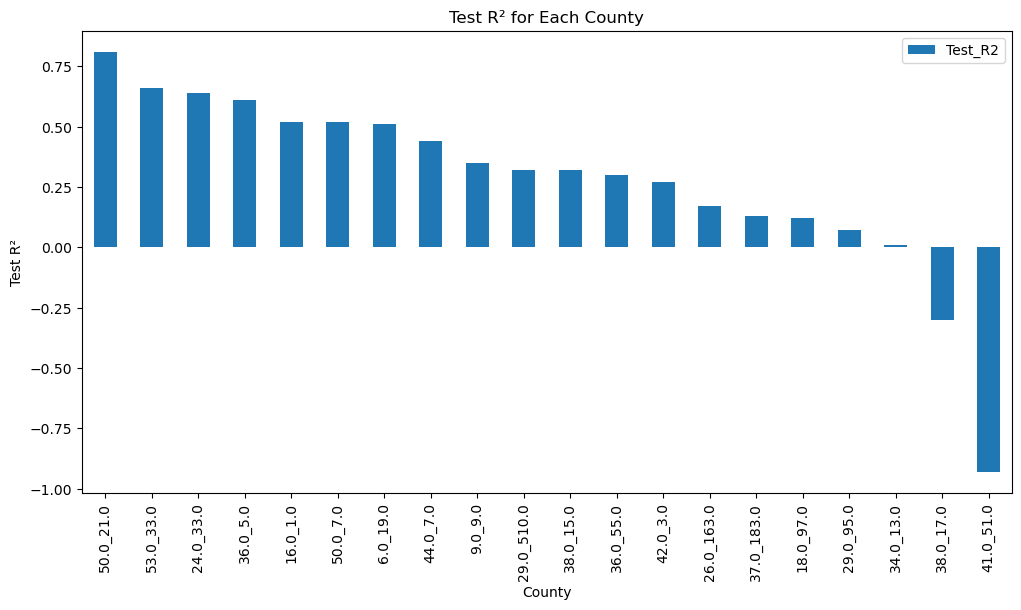

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load Data
data = pd.read_csv('/Users/HP/Desktop/Predicting Air Quality and Pollution/selected_counties_data.csv', parse_dates=['Date'])

# Step 2: Data Cleaning
data.fillna(method='ffill', inplace=True)
data.sort_values(by=['State Code', 'County Code', 'Date'], inplace=True)

# Step 3: Handling Variability Across Counties
county_groups = data.groupby(['State Code', 'County Code'])

def preprocess_county(group):
    group = group.set_index('Date').resample('D').mean()
    group.interpolate(method='linear', inplace=True)
    return group.reset_index()

data_preprocessed = county_groups.apply(preprocess_county)
data_preprocessed.reset_index(drop=True, inplace=True)

# Create lag features for the past 3 days
for lag in range(1, 4):
    data_preprocessed[f'AQI_lag{lag}'] = data_preprocessed.groupby(['State Code', 'County Code'])['AQI'].shift(lag)

data_preprocessed['AQI_rolling_7'] = (
    data_preprocessed.groupby(['State Code', 'County Code'])['AQI']
    .rolling(window=7).mean().reset_index(level=[0, 1], drop=True)
)

data_preprocessed.dropna(inplace=True)

# Step 4: Train Models with LSTM
results = []

# Scaling function
scaler = MinMaxScaler()

# Set the number of time steps for the LSTM
time_steps = 4

for (state_code, county_code), group in data_preprocessed.groupby(['State Code', 'County Code']):
    X = group[['AQI_lag1', 'AQI_lag2', 'AQI_lag3', 'AQI_rolling_7', 'CO', 'DP', 'NO2', 'PM10', 'PM2.5', 'RH', 'SO2', 'TEMP', 'WD', 'WS']]
    y = group['AQI']

    # Scale the data
    X_scaled = scaler.fit_transform(X)
    
    # Prepare data with sequences of 7 steps
    X_lstm, y_lstm = [], []
    for i in range(time_steps, len(X_scaled)):
        X_lstm.append(X_scaled[i - time_steps:i])  # The previous 7 time steps
        y_lstm.append(y.iloc[i])  # The target at time step 'i'

    # Convert lists to arrays
    X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

    # Split data: 75% train, 25% test
    train_size = int(len(X_lstm) * 0.75)
    X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
    y_train, y_test = y_lstm[:train_size], y_lstm[train_size:]

    # Step 4.1: Define the LSTM Model
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs= 50, batch_size=16, verbose=1, validation_split=0.2)

    # Make predictions
    y_pred_train = model.predict(X_train).flatten()
    y_pred_test = model.predict(X_test).flatten()

    # Calculate R² and RMSE
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Store results
    results.append({
        'County': f'{state_code}_{county_code}',
        'Train_R2': round(train_r2, 2),
        'Test_R2': round(test_r2, 2),
        'Train_RMSE': round(train_rmse, 2),
        'Test_RMSE': round(test_rmse, 2)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame for inspection
print("Results DataFrame:")
print(results_df)

# Calculate and display average R² and RMSE across all counties
average_metrics = results_df[['Train_R2', 'Test_R2', 'Train_RMSE', 'Test_RMSE']].mean().round(2).to_dict()

print("\nAverage Metrics Across All Counties:")
print(average_metrics)

# Plot Test R² for each county
results_df.sort_values(by='Test_R2', ascending=False).plot(kind='bar', x='County', y='Test_R2', figsize=(12, 6))
plt.title('Test R² for Each County')
plt.ylabel('Test R²')
plt.show()
